In [ ]:
# Notebook inspired by the models shared:
# Link: https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling
# Link: https://www.kaggle.com/kneroma/m5-first-public-notebook-under-0-50/notebook

In [1]:
#!python -m pip install lightgbm --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from pathlib import Path

In [2]:
# Better rendering 
from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 120px;}</style>")

warnings.filterwarnings('ignore')

# settings to display all columns
pd.set_option("display.max_columns", None)

In [3]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

![68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313238302f312a4336516a63776b4a47556d7730736f743870643443772e706e67[1]](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAFoCAIAAABIUN0GAACAAElEQVR42uydB1iN7RvA33M6HaehvSSVlCQkDSEUkZEdkpDsbJ/Pnl+fv733yN6yV4RsaSdJqSRJKtrrnNM5/0tPHu93xttpD/fvOlfXu3re97mf+37uZz8MPieTAAAAAACgdqGDCAAAAAAAHDAAAAAAgAMGAAAAAAAcMAAAAACAAwYAAAAAABwwAAAAAIADBgAAAAAAHDAAAAAAgAMGAAAAAAAcMAAAAACAAwYAAAAAcMAAAAAAAIADBgAAAABwwAAAAAAAgAMGAAAAgIYGowF969NnLz9+/KSg0HTgAEcmUxoSrzHxJjIqKio6OTnFuI1Rv74OkL4AADR6aOVuyJ+WllFQWEAQhHazZtTZYkFBYVp6OkEQLBZLS1Oj2r9Vqokqj8cjCML/wU27nrbiHmOzOYOGjo79EK+kqHjqxMF2pia1LNOUr6lsNlteTk5NTbWh6IHPlRtLl6/lcrnOwwdv3uhVy2+fMXPBgUPH8Omh/TumTJ5Qc6/Lycn9kSlC7WtIb+s5dW4vlSbpczLKEATQ0tRksZpA5i6huGRlZDU01BpfrtIgPrWcGvDK1ev+/d+WskcZjOlTJ+7euUnkk//+b8tar41cLrfs9J/ly5curN5vFak9IutS9/380fH1G7drOUO57+fvOGA4QRB0Ov1zYpR2M60GYZwnTpyNi0sgCGLHrgO1bCq+9x6SvS8qydXc6xI/JZm061xUVCR8i8lkZn9P+tPy7rq1l+oqtJFZtWLR2tVLweNKKC4Wi5X9Pakm2pzqMFdpKJ9KLzdzxMdcLnfPvsMBr4OFH0tNTfNatxl7X4IggkPC60qUWpoadHpZvDTU1Wv57YWFhbi4wGazG4p9amuXFRRqqCxMwanT59FBR7P2YcFPH/pdHzSoX829LiLirUjvW1oXZBcVFzXWLPjW7XutjM1bGplNmjK7/thLpRGZEeEWjtoUYEMXV1EpjSxXaSifWk4NGPtUWVkZVC85cfKsTWdLweLDqbPI2SgoNK0h7ZccHR3th/evh4SE6+vrDhk8AAq/krB+3WprK4uCgoI+fXrV8quTPiejAzfXUR3N2tfmq52HD5aXlydVBZooNG3aWJM4Pv5jQkIiQRChYRGNyV4MWxnYdrMhX+nTx742BdiwsOls2c/RgXxFXk5OQaFpI8tVGsqnSjoIy2lAv4s+VwmCuOhzbef2jQLtFcdPnEUHw4cOOn7yLEU4GRnfWSyWvLxctXx9Tk4ui8USbjyx62lL0UlM+pgfamoq5T3zXUVFGVcRqh0Jw5dcbnl5+cyfSFco1ioqypM8xlVa4FUh9Vsa/gbxhfTioqIiJSVFSQIsVwKYzZu89PV0JflCyfuGf/zIFBmR6lIkSTSBy+UWFBRKnqtWo73UPrbdbI557619Q6sWxOkql8vNycmlsAhqZaN0wFarVy6ueh4rCdWYq0gokAoZGln4dZUB0iUvN+nq6qAkv3XnnkDjxvuYDwRBdO1ira+vK1JL1m/cZmXTS1pGXb2ZYVNlHVVNgxkzF+CqDzl6S5evtbC2k1PUpkkr67Vqv3T5WpFV6qPHzxi1sVBU1W0ip9HFts/zFwHku/2dnFsamVlY28V+iEdXLvpcMzKxMGnX+X3Mh6TPyWPcJjWR01Rv1kpZXf/vxSuLiooFwn/5KnDIcFc5RW31ZoZSTVSN21rt3nNQwk5oSZAkfAnl1rPXwJZGZvP/WpaXlz9m7KSmyjpyitqoV0/yWF+5dtO0g00rY/NlK7yEQyYI4sjRU0YmYgWOOr/tHQapNzOkSSsrq+t3t+tv7zAI/ULD3ogUwqo16+0dBiUnp6DTTVt22jsMGj1mIn7gXXTMpCmzNZu3lmmqpayuL6eo3affMOFXU0ig0rDZnIOHjnXr4SjVRLWZjjFNWtmojcXS5WsF+qfJEr51516zFm1UNQ169hpYUUWi1nwJNSErK3ut10YjEwtpGXVFVV1VTYOx46Ykf0mJ/RBv7zBoz77D6LG4+ASULn8vXlkt9vLjR+bfi1eatOssLaNOk1Zu37ErTvq585fUrXuuFkOjFiCbzenWwxEJMPlLCg42PCKyfceuLY3MBg11kVBX8/Ly163fYtzWSlpGXVXTQE5Re5izW1z8R4FIPX7yvE+/Ycrq+qqaBlJNVC2s7Y4cPVUt4qpek696riKhQCRMaArh10kG+BM+J5Pih5sEd2xdv2jhnLJq7rBB5GemTy3LMfft3rJmVZm9DR0yEN0tKf4urpKhpaX5/VsCDufblw8iB4BMnTwBPYCvWFqYCzzDYrGi3gTgoPB1/wc30RX8YauWLxIu3o53cyHHyPvwHpEFqF72PYrz06gldu3yGfz8x7gIkc9IEr7kckMXe3Tv2pfU8rZj6/oKxRo/adfTViBkm86Ww4cOohb4hnWrKaz65LH9IuVg09lKRJsMg4Hunjl1mMlkiigz0umLFs4hh0MhgcolUGZ6okCrJrnBMzL8pbDc1qxazGCUtScpKSlWSJGoNV9CTSjOTxP5zRvWrb51/bzIf+9o1r7q9pL+NU5HR1tc0hsY6FPbS6V/OGtyH+8q7pnqMjRqAWZmJOIrYcFPhTUN6wO1rn7/ltDJ3Ez4LbKyMtevnsUh3Lx2XjhSLBZLQnHNmzOD4rHqNfkq5ioSCkRyQ5Mkq6zNDPDnKyR3wCGBT9Axk8nEZp+fnYIaBplMZvrXeGEHnJuZjDLNXvY91qxactx735xZ03DGumTRPPyuoUN+1xv69unlPt61jbEROSiBWHVob4p7zsl+mjpDQSgoNLW0MMefQafT42PD0JNRbwLQdTqdvnDBrHt3rhw5uEtDo2xwyq7tG6rogCUMX3K54SiQI3jk4K4KxZpC/8QJHGd8H96HIN+joND00P4dfr7X3FxHleW/LfXdx7t+eB8qUlYL5s3U19fFfktNTVVfX7efY28+JzPmXTCLxcL54PSpE6dPnUhuXzlz6rAkEqicA/ZwdyOr4sIFs50GOuLw2xgblRR/F5Ab+e06OtoVUiRqzZdQE04e24+LCFcvn/Z/cHPb5nUd2ptu2egVHxtmaGiAm++YTKa+vq6+vu4szylVtxf38a7Y5O/e8jl57ACO4/Chg7Zs9KorB1yNhkYtwEo4YJG6iq2mjbHR+TPet29exFd0dXVyM5NRCAYt9dHFhQtm+T+4efXy6cke49TUVCUUV98+9se99+HfxXPHhB1wdZl8VXIVyQUiuaFJklXWZgZYMQfM52S2NjJEpwf2bkMPnD5xsKyTeKAjORrYa/I5mft2byEXFkpzXk/02IB+fbAQccR2kkTmfXj3iV/Fh9+jBuTl7t7y4XMyOYXpvex7oIva2loSOuChgweixHt4/4ZwIQVnKNOnTsQBXr18Gl3U19etogOWPHxJ5CagJf/+s5xTmP7hfUj296QKxZpa/0QKHFdusA6sWrEIXeEUpiNNlZeX4xSmU0sMu9Xj3vvwxfFuLtiZfU2OwSXi1katcM+fJBKgTiAdHW2Uk6LfimULS80pFJvov/8sx/9InoDnd++asF61MTaKfhtYmJuKUk3ChJZE8yXRhDmzpgkXzsi/HVvXC1R8q8VeDFsZoEoJzhD37d6CK98U6f7ty4ePcRHUP3JLj7isSV5ejpyIbYxbf06MqglDEyfASjhgYV2Njw1DWsdkMj8lRApH87j3XmQC2IvkZ6dUorwiDBJXTZh8VXIVCQVSoYSWJKus5QywYkNCXEYPLzO/X1NHjp88hw7G/vL5wsyYPqmtiTH5SjvTtugg5WtqWY72qxdES0tj+lQP/KSHuxvOi8n5VD/H3nhqcllQKamSRKG1UatzZ7xRq1ov++74w/C/4x7ukc5D8X/1sO2KDpKSktlsTlV6WSQPXxK5kXEf77p86UIGg2HYykBgAE65saaGWuCpqWWjqHSaa+NmZCVFRTSjl8stqaiIeDweltKcWdPwACgVFWWsG2+joiskAZEkJ6ckJibhH+rXuX37Huo6UlFR/mv+bFITizteWSXqbbRwk9TVy2faGBuxWE2QeCVMaEk0XxJNwDPOjxw9dfa8D3lOYFUoV3NSv31DPga3VGMp5eSKnRCR8DGxuZ5JS0Mz6p9m89blqmheXj45Ed/HxKIJnTVnaNWCgK7eveuHtM6ms6VuC53fH9y966+O549IzrKyMshGJk72TPyUVEOfVwsmT/0KCQVSuRy7ohlFzUmjYktRjh41/J9/N6Ee77j4j0ym9CP/p8jPD3bqT5XTfUm5evXm26jonJzc1G9pqanfBB54F/0eHbQ1aVPuGDPcCEMQhLp6xaZtaWs3I6+0oKGh/i46hiCIouJigiDS0jMyMr6jW+Pcpwn3QfJ4vNRv38gKUSEqGn65ciMzYfyYysW6XEQKHM8dNG5j9Ks0dnak81AlJcUbt+6icXmtjVpVYl2L5C8pP36UFT8tOv2nv9/sV/k3KytbeFAuhQREoqOjjRvAUc0GLUzxKxc2IX88kynd1sT46bOXaBiO8ChF1G5c0YSWUPPL1YQRI4as8dpYVFSUkfF97Lgpfy9e6T7edf5czyoux1au5rQxbh0cEpaSknrR59oo56E5Obl4wYcO7U3FGkJahiRFBC6Xm5efT/2MvLzgknP6+ro1amjVgoCuIqmWrqAQ1tLIjDywjpzd0+l0V5eRR46eJAji4qVrPpdvOPS2mz/XE7kHSXAeMWTmjMkkrWZit1HLJk/9CgkFUrkcu6IZRc1Jo2IOuK2JcYf2piiHOnP2IoMhhQopQwcPROUykXit2/zPv5uo7Q2LtYZmpElIXl4ePhZZ9GYwGCrKyrUTviRyqw8M6Nenaxfrl68CX74KVG9mqKSkiE1i8aJ5lQiQPO5dRUWJfIt8mpaeXsVZMc8e3xUegJOTk4Mr3AK38JW0tPTqSmhJNF8STTBs1fL2jYsTJ3smJSWjl/5vw7ajx8/cvXWpRmdXe61d3t/J+WfpfMzEmbMXZmVlo+9sa2I8SHyhvJ2pySzPKXl55ThXFRUlg5Z65XiU4UOEpyElfExsWIaGRVFQUJiYKKJeixeI2Ll9Q+k0kNO8Uu77Pbrv92j61In7926TqNDZXFuSKWe1bPKVFkhN59g1LY0Kb8bgMno4csCnz17EF8eOFdv+7Hv/4ao1/0PH491cetn3aNGiud8D/w2bdvxXmmV95rjqUydoN2uGj/fv3Uau0+DO/6rMEZQ8fAnlVh/IyPiBJ2xwuVykfEpKimtWLsHdMxWCXFxNS8sg38KtPTVXVtPVbSHOy+KKUbmvljyhy9V8yTWhl333D9GhZ85ePHDoaGBQKPrgaTPmv375oOZSP4y0KgXOdxx62+3fu42iUC4vLyduUdtaNuR6Ymh4dI9NZ8v1QkNqGQyGtZUFOpaVlTl8cOf8eZ579x0+ffYiKq0eOHRskFP/Af37NFCTr7RAajrHrmlpVNgBjx41HM2UQh0tqO/KoVdPcc/7l7ZRo2Z3XFD9/PmLwGO4IhIaFpGXl08WGZvNqbW9cVisJtraWqgkpaqiXPWiYqXDl1Bu9YHtO/eiubyvnvulpadnZ2W3amXQob1ppfVeQaGpmpoq0uNXAYHkOQPPnr/8pXWaIpvOqg6ucoVHRBYUFGIvkpWVjVunhSfCVTqhy9X8CmkCkyk90X3sRPex+w54z5y9ELXg5eTkkksM1VjVy8vLX7V2PRp0uXH92levApVVlNoYt8Zj5eqKGjU0AQHKysji4w8f4nF7Q3hEZCUaOXNyciXJdtqaGO/dvWXt6qU9ew1ErbX+j5/WmgOudpOvtEBqOseuaWnQKyEXXBZDjHIeRu5IE6o0pAlUGlCzicBj3X5NYczLy589dxFS8YyM7zNnLySvzFALYPvZsGmHQKUk8VMSuWmrXAJeBz9+8hz/0IgJCcOXUG71AeyWjh0/LSsj26KFjpqaahU3VMDLne474I16U5CLwv2Lo0gDLqqXzr9mJxcUFC5dvhbnuX8vXokixWQyhwweWF2KVK7mS6gJj588x4IiCALnxXQ6HXWMaWmVjWWLi/+I1ouo+qqx76Jj0AcHh4SFhITp6bXQ0tRkMqWrOFCxNg1ZckMTJ0AmUxo3Y2zZticj4zubzVm/YRsaLiMheHDDu+gYgcUE2WzOy1eBqLOPzeacOXsRi1dNTRXnxnjaXgM1+coJpHpz7NqXRmX2A3YZNTwwKOR3+7P48c+oswcdHDpyQl5eTklR8cq1m8Irg9t0thzQv8+du36oK9vnynU1NdWkpGQej4eHfdcOf82f7XvvIY/HCw2LMGnf2a5HNx2d5hkZ30PDIt5GRU/2GHf44C4JgxozdhL5tI1x6+i3ryUMX0K51QecBjiihDt05MShIyfwdSUlxcke45YvXSjhEpL/TYVZd0qHQaalpZtb9rC06FgqsTdo4IOSkmJ1dTUJY2nRsZd9DzS6cNeeg9dKNwh6GxWN+lZLlzKYjvPiqitSuZovoSbs3nPo2o3bDr3tUNnlytWb6Lq1VSc0DKTlrypFUVGRcVtLJSVF7WbNggKqVKTr0N5UV1cnKSk5OTnFddwUAYv2WrvCoXfPulLLajc0CgEOH+qEioaBQSHqzQxZLBZSVDqdLuHyedZWnex62j5+8pwgiImTZnofPdXRrD2bzU75mvr02cucnNzPiVE6zbXfx8S6TZi2aOnq4UMHqamppqR8xV2B3X8ND6Zmx679O3bt/2+rCTP9a1yFOnRqwuQrJ5DqzbHrIAOs0Dxg9PucGIUnShoaGpCfF54HnJ+dIjDEHxknGrhInlH3MS5C5GgRvOzR71ajX7MV+ZxM/wc3heMi/KTIaV58TiZuslizagm+uHXzOnFLiVKvI8PnZPr5XhPb2PhrRpok4UsuN5FiqWisqafBUQs8NzMZTQYVyYD+fSoxDxjNuxUpJTU11RdP71FPY63iUmVfk2PEjeAd7+ZCntgnTsIVUiRqzZdQE2Z5ThEOQUNDnbwIgEATZSdzs6rbywHxY38YDIZAStXySljVa2gUAvzpDP67HBidTl+xbCH6SJHzgIV19XNilLi9IOl0OpoS/e3LB5ExWjBvJrW4xK3shsATbavX5KuSq0gokAoZWkWzylrIAKUElrwRoKioqLi4uEN7Uze30bhXXEGhqayMDJ/gtzVps3TJAuPW/+n3Tk/L0NNrMWL4EPOOHQiCkJaWHjtmpLQ0o6CgkNmEqa+nu2D+zEMHdhYXFzOZ0gP79+1u2wWXFzzc3WRlWZmZ2U1YTVRUlPv0tvvXa8XsmVPLQk7PkJOT62RuNtZ1JC6vsWRYn5OS1dXVHHr3HDyoP8WT6WkZLVroDB82iNyEzmZziooK2xi3dnYe2sqgJbrYxcZqxPDBTZjMgoJCGVkZJSVFnebaDr3t/po/c+6cGRTt7aUzW5pzuRzDVgYdzdoL/Ab069Ota2cJw5dcbiIjS04OCWMt/KSEAh/p4v4qIAjNQz9+dN+8OTNGOQ9jSkujLSk/xCVMnezetKm8OInl5ubx+fwO7U1dXEZoaWmSisAWI52HMqSk8vMLZOVklZQUO7Q3nTlj8vGj+4z+28VILQEBZGVlkj+naGio97LvPnLEUGlpEcML5OXlJk0cp6/XglvC5XC5SkqKGhrqQwYN2LZl3fy5ngKmLlLCFVIkas2XUBPsetoqKSlwOFyC9jPAdqYmHhPdTp84RF67Z9gQJ4LgFxcXSzOl25mazJvriTK4SttLwOvg0a4eJSUl+nq6D/2uL108f5bnlM5WFsGh4dnZOTwejyElNcipRjaX5HK5xcXFxsaGY8eOamPcWuQz1WtoFAJUUGjq5jo6LS09OydHSUnRrqftkUO7J4wbk52VzS0pcehthz03ha4qKDT1cHdrZaBfwithczhKSopKSoqWFuajRg7ds2szKqfKyck69u1dwi0pKiqWbyqn01y7a5fO+/dumzbFvdyuQym6lFmHdsL5kk1ny9EjhyGtrnaTr3SuIqFAKmRoFc0qayEDpAkvuAUAkvM+5oNJO2tUMf32JRY7p5ycXEXVMguJDH/ZULZ5ByrEmLGTzl+8ghb8m/1rKS6CIP76e8W2HXvRho+XLpwAQYHJgzREV+VBn4CqgOfh/fiRiTpC0Hii1WvX4+qdcBMf0FhSv2yy5h1fPzz+JTAo9PzFy+i4a5fOICUweZCGuH+HGjBQJbhcrlEbC7wknoaGOpMpjXcYpNPply6cGD7UCQTVKDly9NSUaWWbpDGZTG1trYyM79gr23S29H9wqxJLoQFg8n+INKAGDFQJBoPh//DmgP59UNtLWlo6Vj6H3nZ+vlfB+zZiJnuM271zExoTzmazExOTkPdVU1NdtWLR3Vs+4H3B5EEaFP8ONWCgesjKyn4XHZPx/Xt2VnaLFjqGhgY1tFAGUA95Fx2Tlpb++XOyopKidjOtdqZtwfWCyYM0yv0vcMAAAAAAUAdAEzQAAAAAgAMGAAAAAHDAAAAAAACAAwYAAAAAcMAAAAAAAFSBctaCriGePnv5yP8pWiy62gkOCT933ufVq8B2piZNmjSSuRC37tzLyPjRokXzP0o7k7+kXL12q7WRocgVmytHUVHx9h37mjXTVFZWqqFA/szEqvPcoKCg8PyFy9eu3+bx+C1/berc6KnzWFeLQTUslcvKyg4MCv2Wlq6uriYlJVWXNeCcnNwp0+Y8ffZSwAVOnDSTvDspWqBu4qSZaPfN1WvXnz3vUxOSPXL0lJWN/emzF0+ePo/27GwEcLnc0WMm+j3w/9Oy5lOnzk+dMY9694uKEvA6aNHS1WgH7wrhe+9hK2PzwKBQHAjeoLB2Emvg4FFjx01pfKlcLblBXl6+hXXPOfOXPPJ/euHXQpiNnrqKtYS2UC3h15DKnTx9vhL/yOPxxoydpKpp0LPXwM5dezfXMxHwfbXtgIuKi48cPSWQ3cz/a+nxk2eDSHsGEwQxd/7iwKAQDQ01tHFjJ/MOlfOvK1evE3eXzeb8vXilh7tbWPDTiNDnlV6PlPottc/7mA8FBYUWFh3/NAccGhbRob0pkylY/c3I+D5x0ky02UhFCQkJZzAYIrf/oybybRSDwVBTU0GB0On0TuZmFU2sSqtWQUFh7Id48tZGDRQBCVQlNyCz/4B3wsdPQQH+Tx7dPrh/Rz2MeFWUthZiXaHPk9AWKg05/GqXG1I5y0plp0VFxVpampHhL/mczKAAfxarycTJM+vSAWuoqzEYjKysbFINI/j5i4DSRbkyyFX+gNfBK1csotPpcfEfc3JyLS3MK/G6g4eOvXkTJe7u8xcBWVnZ49xGVzFS1G+pfYJKS4KdOpr9aQ44MDhUZNYcEBh8/ORZOp1WOafexthIXl6uov/4919zYqKCDEp3ZQ8NizBsZSBy60PqxKq0asnKynyIDtm80auhp6mABKqSG5C5dede1y7Whq1a1tuIV0VpayHWFfo8CW2h0pDDr3a5IZWrXIlBVlZm+9b/oaqdpUVHl1EjEhISc3JyK/0x1dAHvP/gUe1mWsOHDSqr/i5cpqKinPH9u5lZu969eqKL02fOZ3M4B/dtp9Pp9/0eXb56c8P6Nf5Pnh04eCw4OMy8YwdyZ+0j/2cHDh0NCAhWVVVJ+Pjprq+fRaeO4RGRBw8f97lyQ0VF+fPnL8lfUgS2TN+568DZ85diP8Srq6kGBYd27WJNp9Pfx3w4cfLciZNnY2Pj2poYs1isSrwlMCj06PFTPXt0Q/+YlZW9eeuuZs20VFVV0Ht/Zo5xCRs378jNy0PbTnG53Es+144dP/PgoT+dLmVgoI/fe+eu36Ejx2/e8i0oLKSoo9/38z9w6KjfA38dnebXb9z+kvIVpxSbzTl/4fKx42f8Hz/NzcszaSMikHXrtxAEoafXAp2mfE3dtmOvoWGZnVCEsHnLrpKSEvyPN27dffr0pUUnEaVFFPFiNnvPvkOXfK4xmUxyNCkkQHErLS3jiPfJY8dPp6Wla2lqrl67ftqUiQJv37nrwJmzF+MTEjXU1Z49f4Uj9S465uix06dOn3//PlZPr4W4HGHZCq/O1pY2Nla79xy8eOkqnU43NCzbTLvchM7Ly0dfu2yFl6VFxxHDB5ebWBhxCixJaqJ/P+x9oouNtZSUVHhE5CWfa1aWnS5dvn7g4NHo6JiOZu2lpaVfvgrcsWv/4yfPWrc2VFRUQP+4e89BGZmfybRrz4ErV2/SaDQcXxSOaVuTnbsOnD5zwbabDTIQkZJ8/iLgzLmL5M1xT54+H/n2HTZDClujkEC5uYGEwV6+ekNBQeHr11SCINBOseL0QVysKV70/EWA97FTZ89dyszMamdqglb9/fEj84j3ybPnfNLS0tuZmmzesktDQx2pSlpaxoGDR48dPx0ZGWVgoK+g0FSk0go/JjLpRUZEXKzJYpE8miI/jyKCFLZAhiIzIevwocPHw8PfmHVoh9Mdhy/O2MmIE6PIHL7UWn+q3P/WrUZxqUpeff3G7ah37/9Zs6zy7pNis34Jfx3amzoNdETHMe+C6XT69atndXV1pk6egC5GvQmg0+kH9m5DpwsXzNLS0hw6eKC2tpZDbzs6ne7q4oxDmzdnBp1Ot+tp287URF5erqNZe6cBPwPfvXMTMvVO5mZ2PW291i4nf0NhbmrphuSKaDfswU79+ZzMrZvXMZnMfo69Pdzd1NRUDVrq52enVOItkz3G6eho43fdvH7+Z0Un4BGfk5n9PYlOp0/2GM9gMNqZmixaOIfPyfySFN2hvam2ttbUyRN6dO/6s4zyK+6e0ycpKDSdPnXieDcXFRXl798SRIp0lucUgiBsu9m0MzVhsVja2lro8/iczI9xEa2NWqmpqQ4fOsi2mw1BEFjO5J+Ghvp4Nxd8umLZQiaT+fVzDHUInxN/Vk2OHNyF/9HSwhy/mvxDEV+4YJaSkqJtNxsNDXU6nR79NhDdpZAAxa3I8JdaWpoaGuoOve0UFJqi8i+SM/7lZibb9bRVUGiqoqJs19PWrqft58QoPifTa+1yOp1ubWUxynmohob6zyLR+1Bxn+3mOkpJSbFH967I2Px8r6G75Sb0np2b8PGWjV7lJhb5J1K1JExNZDVqaqr42NrKYkD/Prq6Oui/FsybuWTRPAWFpr3sezAYjK5drMnxXTDPU15erkf3roatDOh0Oo7vwgWzLC3MO5mbaWtr6ehoI20UJ8k9OzcRBIGkzedkZqYnslisJYvmoVMKW6OWAHVuIEmw+/duQx0KHc3a2/W0vXzpJLU+iIw1xYsWLpiN0newU38Wi7Vq+SKUp2lra2lra/XtY6+g0BSlAlKVmHfByCjmzJrWtYv1vDkzRCqt8GMi011cRETGWkBhJIymyM+jiCCFLZB/1JkJ1mFtbS0UOE53HL44Yyf/xIlRXA6PXq2g0LSk+HsV8+pPCZFKSorkbLYSv2pwwH372GODnz51Yhtjo5Li75YW5s7DB6OL491cdHV1ivPT0KldT1sGgzF08ECk4gP69zEw0Ee3Ll86RRbB1s3rCIJYs2oJOj1U2snx5VO0uC8xbGXg5joKHV+/epZOp587441OD+zdRhBEWPDTSrylk7nZ0MED8emaVUuYTCaKjv+Dm2jvlxdP76G7JcXfra06WVt1yv6ehE61tbXQv3+MiyAI4ujhPehJTmG6yFhcOHeMIIjDvxR3/brV+POK89Pamhi3MzX5mhzzy2eMp9Pp6F3kXy/7HpYW5viTDAz0hw4ZWG4IN66exVJCDzOZTCwZ8g9H/Mmj23xO5rPHdwmCOO69j1oC1LfamZp0aG+KFP1rcoy+ni6Ws8APGQw+PXXi4M+qXmmOgOTMYDAWLpgl7rMVFJoiJ5T+NY7FYk32GCdhQqNURsf+D25SJ5bwT0C1JE9NZDV9+/TCx0wm02XU8MLcVFQClpeX62Ru9iUpGtkgnU4XmUyZ6YlMJtNz+iSyJbq6OGNVpJDkw/vXcaz5nMyjh/cQBIGKXBS2Ri0B6txA8mBPl372h/chkuiDcKwpXoSCOnXiILoVHxsWEvi4pPh7R7P2bU2Msa62NjLEquI+3tXAQB8Hjg8ElFbcY+QfdUQEYi2sMJJHU+DzqCMozhYEftSZiYAOO/S209fXJSstzlEF5CbwEylG6hwe+fJK59Ulxd+PHNw1y3OKiopyR7P22HjrzAG7uji3NTFG2ZmsrAyq6fbtY9+je1dUTGAymbj6W1L8HVVucjOT0ZXhQwe1MzXBlWnbbjY45LDgpwRB3Lx+Hp1OnTxBW1tL3GdkpicSBLFr+wZ02tbEGNfLXzy9Z9PZUl9PF8mxQm9BevMvqcLtNMAR+7YtpX1yOKVxjhwU4I8EsmPr/+h0Osqgo94ElO7gNh4VvihaFGw6W+LTiNDn+POOe+8jCOLVcz9898jBXQRBRIQ+FwhkzqxpCgpN0fHdWz64nkcdwppVS1gsFta2oIBHZMmQfyjiB/fvIH+kz4UT1BKguHX50kmCIO7e8sGvGD50EJYz+fflUzRBEId+vZrPydTX1+3n2Jv8jI6O9vChg8R99t7dW/AVXV0dVFIsN6EZDAZyEls2emE3SZFYwj8B1ZI8NZHVLFuyAB8btjLAVbSuXaxZLBau4S2YN1NeXk5kMpHjiy2RXKekkOSnhEhyhcbaygIXCChsjVoC1LmB5MHOmzNDRUVZkliIjLW4F5UUfzc0NEAlV/IP6SpuSOBzMocOHohVZZTzUHl5uag3AdRKK/IxgR+1YgvEWlhhJIym8OdRR1CcLQj8KDITYR0mpzs5fGG5CfxEipEih0evRoWYyuXVIYGPCYJwGTX84rljqPRQlV81LMShoaGelZ39s6S295CsrOyE8a4/C92qqhkZ31EXlJKS4kR3N3IH+PSpE/EomNDwCNQwlfAx8U1klMuo4TjkF6WDufB4lsCgUGtLC3GfgYbJWZSO5ngf8+FddMyt2/do0so0aeURo8Z1Mjd79cKPwWBU9C1vIt+y2WzzTmZ4BB15ZFBoWISGhrrHr9gRBHH16s/im5WNPU1aWbN562s37pw5dXiyxziCINoYG02dPOHI0ZPGba1u3bknMhaJn5LeREa5uowU+XnXrt82aKlv09kS30X9/8L9Im1NjHNyctFErJ2797czNXHo3bPcEIKDwzq0N8XTfl6/DhY3nig0LEJNTdXDfSw6DQv7WWBsX5qOFBKguHXzpq+ammrfPvZYzi8DAkWOwAoKDvkZiFUn3NeVmJjk6uJMfiYnJ1dkjxr67KmTJ+C3pKVlaGlpSpLQrY1aycrKkEedUCeWiDFl/1UtyVMTWQ1qckTHszwno49BfYSDnfrhkTho6Dg+1tLSwMnE5XJxfFE4c2ZNw+FQS1K3hY68vFzshzg00DIwKGT+XE9qWytXAhS5QYWCDQ4Jw8O4qGMhHGuKF72JjIqLS3AW6t28fv2OhoZ6L/vuInV18aL5srKyZp1sp0ybg0enCiituMcEOnGpFZsca5EKI2E0hT+POoIibUFEoojPTIR1GKe7QPjCchNAWIzUOTx5BFbl8uqoqGjULDHSeWjV99yshhmWWpoaWVnZeXn5+w54z/Kcgr5JRUX5R2bWjx+ZBw4dK+2AlP41CSSMIIhBg/rjse+JiUlzZk4jCCI6OoYgCNPSQUyIiz7XUD8EGv/9Nip6lPNQcZ8RFhaBp5cgf/Dw/nUDA315OTk1NVX8WEXfEhb2hiAIy05liv74yYu0tHSs98Eh4QP69SHPkwkNfzN4UP+d2zcQBKHTXJucX9Dp9IP7d4weNeKvv5cPGeb65NFt1PlBJiLiZz3DzKydyM97H/OhXTuT/4xdfB2ko6Otr6crEI5J6ZCB2Ni45OQU33sPb147j+2QIoTQ8IihgweKfLVwcaevgz2OXXBIuJKSIvIBFBKguBUeEdmhvSka3oKGzaemfhOZvwSHhMvKyrT7lYIxpdPNyQn6LjomJydXWLbof50GOOL3hoa9KSoqQi6w3IS2/pULBIeEozkM1IklPIFBQLUkT01kNealOSA67t+/L7oV+yE+KyvbaaAjeYqFe2khGH1qv74OOL6BQaFFRUVIMiicIUMG4LeUK8nWRoZxcR8JgljrtaFrF+t+jr2pba1cCVDkBpIHy+PxwiMi58yaJkkshGNN8aLIyChcrBQYFdXWxBjrqoCqdDLvEB35evvOfRs27Uj6nHzvzhVhpRX3GBnqiAjEWqTCSBhN4c+jjqBIWxBR2BWfmQjoMDndhcMXkJsAwmKkzuHRq1E9rXJ59duo6HamJhQKWavTkFAPU0FBoffRUwUFBTNnTC7zyloaGRnfD3ufYLFYM2dMIVdBFBSatjZqhXNkXMBB5RdcmLp1+97TZy9xZeJt1Dsul2vWsb34GnBYG2MjVG7Ky8snCEJbu5m+nq6ApCr6ltgPcfLychoaakjply5fi7PCnJzcuPgEAf3Ly8uTlZHR19PV19MVWVrvZd/90oXjPB4vRNTMtqysHIIg8AjMO3f9Hj95jj+Px+dxuVzSt8Vfu3EH57ZkkMpGRUXPnL2wl32P3xm0+BDy8vJTUlLR0CdhyQgUw+PiE8jj+Evn1Zkji6WQAMWtrOxsXJwUkLNgzSA8sp2pCf53Ho9XWrcrIY+9VFJSHDJ4gMjPJg+eP3joqIJC0yGl2YSECU2OO3ViCSCsWpKnZmhYRGn5xgBbEK7vogylc2crctXH+pdBCcR3/wFvJSXFgQMccWMA2dmXK8k2xkZx8Qk+V27c9/PfvnX9rzQVa2vlSoAiN5A82PcxH/Ly8rE2UsdCONYUL0K3hK04KzsbZyAidVVFRdlr7XKXUcPxUhICSivuMYGCBUVEBGItsqVHwmgKfx5FBMXZggDUmYmADpPTXSBTFSk3AQTESJ3Dk19dubx64/q1keEvq2tOVDU4YC0tDYIg/l2/ZbybC05aFWVlLpf7vw3bFi6YRZ5zGRwS3sncDJetQoLD6HQ6qrbqlarL5Ss3CgoKz573meY5T0GhqaVlWbErPT2DIIivKak5ObmocVtI595YW5W1bpmVBnj4yAmUwWVk/Lh3/yG6VdG30On0goLChI+JCR8Thzm7JX/5wmQyO7Rvh9KSx+OZ/XdJh45m7R88ehL7IR7pbsDr4ISPiQRBPHj05Nbte7/aHu/Q6fQuXayFY2FsbIRGtxcVFZ897zNp6izy57UzNXn67OWb0oJ5aNibYSPGGrTUW/z3PJFKqaWl8e/6re9jYskz9ClCQInyNioavXrK9DlKSor41QLmzePx8FoTXC43PCISt1CJkwD1rTbGRsEh4clfUpCcEz8lYTkLzjpIz8jJyc3Ly0f/i4q6Bw8d43K5BQWFXv9uPn7y7OaNXsK5DPrsTVt3PX7yvKCg8MChY0ePn1mzcgnSTwkTmhx36sQSQFi1JE/N4JBwvHKIgAUFh4QL+2Pz0jwxOCScHN89+w6fPe+zeuViFF9ymIhyJdmmjVHCx8TZcxfN8pyC6ygUtlauBChyA8mDRXU73EpJHQvhWFO8CDUjbd+xLy8vP/lLyuq168+cvUgQhL6ebsDr4KTPycKqsn7jNrT+QcrX1MCgEFxtElBacY9JnhwCsaZQGEmSSeDzKCIozhYE/QplZkKR7gKZqsCHCSBSjNQ5PPnVlcir09Iyutj22bptT7VNea76IKygAH8kcTwLhc/J9LlwAlWO8fAKgQ5w9HMePhgN4EJ3UaMWQRC6ujo3r5+n0+l4PMv3bwk4IxAedIdGYO0jDa5Bw9CZTKaSkiJBEHjkZ0Xf8vrlQ1SrptPp7uNd0eB+PFhAeABCROhzNCFPQ0MdOUIklhPH9jMYDAWFpgoKTeXl5cjjtgRGT/Tt04v8eQwGA3/eh/ehrY0Mcdr1c+xNMQavl30PgiB2bF1PvkgdgvOIIeJeLTCUiRxxVB68eO4YtQSob/n5XkNVSWE5C/zwrDs0lJHPyVy1YhEuwKqoKHv/Grso8Nu2eZ2+ni6aNYRqNiuWLcSDLCRMaPIxdWIJ/IRVS8LUJFuNsAX16N7VobcdefKJvLwcitSm9WsZDMZ4Nxcc31UrFomzREkkef6MN0EQHdqbCow9EWdr1BKgzg0kD3benBkaGuqSxEJcrCleNGrkUFJrZ9k484f3b2Bdnewxfs6saUhVSoq/tyktk+noaKOZSzhByUpL8ZjkySEca4psttxoCtiUuAhS2ILwT1xmQp3uAmEKGzs5miLFSJHDC7y6Enn1xdJxW//+s7zqfhP9aHxOZhVdOI/HS/qczGKxtDQ18EU2m5Py9atwZ0PipyQ1VVVcJ05Ly6DTafgZNpvzNuodm83pZG7GYEglfU7WbaGDC0oZGd/fRkVraKgLz4n2vf+w/0DnkMDH5PaQnyW4hETUd0XulqvoW9LSMt5Fvzcw0NdtofPjRyaPx0MfnJWVnZefr9NcW7iv601kVEFBgby8XIf27XAPcWpq2vuYWBaL1dbEmGLhGB6Ph+ouIj+Pzea8i36flZWtr68r3FlIbm61sLbT1dXx872K/7fcEFAPIpdbgl8t0DWCm/HJEUdpTX5SnASobyH5YDkjkxDX3ZCXl29tZYEHcaA0kpeXa2PcWtwqVzk5uWw2W01NNelzcmJiUof2pignIs/oLzehBeJOnVgCCKuWhKlJthoBC0r5mspq0gQL6sePTDaHgyxx9JiJsR/iw4Kfvo/5kJaWLhBfgXAEhCBSkiihRf6XOFujlgB1biBhsF1s+2hoqF+/claSWIiLNcWL3kXHpKWlC2Q74nQVtQbl5eVrazfDTevCSkvxmITJITLWVYmmgE2JiyCFLQjnY+IyE4p0Fw5T2NjJS/qIFCNFDi/w6orm1ej5TuYdqmuB+mpwwHUOj8cb6eIeHBL28UOEuLzvT2OYs1vA6+Cw4KfkUhHwR2HUxsK2m80x772NOI6hYW+sbOwP7d8xqXTw6h/CnxnrRkmDd1dDhrs212t76/a9vbu3gPdFbNm258bNu8eO7AXv+8eCRmBVfZODessj/2ctjcy69XC07WYzYfyYPyRZ/8xYN2IafA34xq272VnZPXva6rbQgeREXPK5pqysjCb+An+sA75+446jY+/GWghL+pzs7/9MXUOtX9/ef07J+8+MNThgAAAAAACqEyhDAQAAAAA4YAAAAAAABwwAAAAAADhgAAAAAAAHDAAAAAAAOGAAAAAAAAcMAAAAAAA4YAAAAAAABwwAAAAAADhgAAAAAAAHDAAAAADggAEAAAAAAAcMAAAAAOCAAQAAAAAABwwAAAAA4IABAAAAAAAHDAAAAADggAEAAAAAAAcMAAAAAOCAAQAAAAAcMAAAAAAA4IABABAHjc//+RcEAQDggAEAqD2WLP+nTbvOnbv1ycrOAWkAQMOCASIAgIZLQsLH2NhYOTm5goJCJUUFEAgAQA0YAIDaoLT9+Sc0GrRCAwA4YAAAAACoJDRwwAAAAABQS+Tk5K7bsK2jRXfTDjYDB49+FRD0J8Qa+oABAACAuiQrK7tnb6c3b96i03fR733vPThyaPfECa5QAwYAAACAmmLbjn3I+xoZGTk6OkpLS/N4vCXL1qSlZ4ADBgAAAIAaoaSEd8fXD3nfoKAgX1/fLVu2EASRlpb+5s07cMAAANRr+KWAHICG6YBL0ktrui1btlRUVCQIwsLCAt369CkJHDAAAPWL+IRPGzbvPn3uirQ0A81BSkpKmffXikf+z0tKeCAfoAHBZEp3t+1KEIS/v//WrVv9/PwWLFhAEASDwejWzQYcMAAA9YXMzOxZc5d0tLBdumxVZORbKSkpVAPOyc09eMi738DhPewHvnwVBIICGgpZWdkxMbEEQXA4nIULF/bt2zcwMJAgCB6PFxgUAg4YAIB6wfuYuJ69nfbuO5iXlyew+Aat9JTL5b4KeO04YPi+A8dAXECD8L4DB48ODgkjCKJJkyboIoPBkJKS4vF4U6bNPn32UiOOPkxDAoCGwbvoDwMGOSclfS73yfz8/HkLFhcVFy+YOx3kBtRr7ztk9MtXrwmC6Gxt4XPh5KuAIG4J18iwVdS795OnzmazOR6TZ9JpNNcxzuCAAQCoG6LexQ5wck76XL73RaOxOBzOkqWreDzewvmeID2gPnrf7Jz+g0YGlC64YWlhfufmJRUV5ZHOQ9BdS4uOJSUl02bM43A4Ezxm8Pn8sa4jG58QoAkaABpA3Xfg4FGSeF8yXC53+Yq123YcAAEC9Y3MrOwBTr+8r6X5/btXVFSUBZ7xcB97+OAuKSkpLpfrMWXmqTMXwAEDAFDbdd9+A4cnJVVmPsbPevCyVVu27QMxAvXK+w4aMvpVQCBqeb53+7KyspLIJ93HjzlyaDeDwWCzOZOmzD5zzqeRiQKaoAGgXnvfgYNHfv6cLHCdRqPx+Xwe7/eMI56YqcAcDmf5yrUEQSxcAG3RQN2TnZ0z4FfLs5VVp9ulLc8Uz7uPH8Pn8aaWtkW7e8ygEURj6g+GGjAA1FPeRsX0dxohctSVlJRUv359Xcc4s9ls5I9bGejPnzcLrWMg4Ko5HM6yFWugHgzUOVlZ2f2dnHG/773bl1UpvS9iovvYwwd2MhhSXC7XfZLnqTMXwQEDAFCz3ldk3ZcgCBkZmQP7dt6+cb5jB1PsZeXkZP7ntfzV8wcdO5qh6UnkCjGXy12+cu2mLXtAsEBdkZmV7TTEBW1zZG1tce/uFXEtzyLqwRNcjxzaLSUlxeFwJk2Z1Wjaoml8Tmb9/LLAoNCDh4/RSveGVFVV2bh+DWgw8Ifw5m2006BRn5NFeF8Gg7Fvz7Ypk8ah04+JSbEfPsrLyXaxsaDTf5ank7987W43IDExUaAejP73f/+ugbZooPbJLh3z/OpV4E/va2Vx91Y5Lc8iOX7i7JTpc7lcrrQ04/jRA64uI8AB1xQXL10d7eqBjju0N40IfQ5KDPwJRL5939/JOSUlRWSfbt++DndvXqTTqTYtP3v+6rgJk8k9xLhOLC0t7bV25eK/Z4OcgVojKyt7wKCRr36Neb53+3IlvC/i2PEzU2fMK/XB0keP7HFzHdWgJVOPm6BJq/wQNNBh4E/xvgMHj/ry5YtI70uj0WbPnErtfQmCGD5soL6+nsh/53K5K1d7bdyyG0QN1A6ZmVkDh5RtsG9l2en+nSuV9r6oP9j7V1u0x+RZZxr4OlnQBwwA9YU3b6P7Ozl/Fj/fV0lJqZO5WbnhsJowrSwtyAtVkuFyuStW/rNxM/hgoObrvtk5TkNdXr4sXeuqs+Xd2z6S9/uKY/w4FzQ3icPhTJw88+z5yw1XPjANCQDqBW+jYgYOGpWSkkLxDJPJ1NBQkyQ0HR1tch2az+eT/XFJScnK1V4EQUBbNFCD3jcr+/daV5bmd25crErdl8x/5yZN5/F4bg1znSyoAQNA3RMR+a6/04jk5GTqbX15PF5eXr4kAebk5Apc4f8XDoezYtU/G2FcNFAzZGZlDxg8qmy+r6V5FVuehZnoPvZI6TpZHA530pSZpxvm3CRwwABQx7x5Gz3AaWRy8hcJqhRZMTFx5T7G5xOhYeHlPsblcleu+mfD5l2QBEC1132dhowuG/NsbeErfq2rqjBh/BjvX+tkeTTMuUkNtQl6+4592Tk5qFw/2WN8ixbN8S3/x8+ePX+FjjuatRs8aMDvakFu7o6d+8uKHnT633/Nxhtg8XjE6bMXEhM/oTAHD+pv3rED/sfIt+/OnfdBjXhqqqrz58FEDqB6SEn5NmyEG3XLM4bD4Zy/eKWztTn1YyFhb6KioiUMcPWadZoa6hMnjIG0AKqFbNIuC1aW5ndvXqreuq+ADy7hlUybMR+tk0UQxNgGtU5Wg3XAO/d9/lVjcOzbW8ABe63bjI49Jrr9xwHn5K75ZwNq5aPT6bNnTsUOmC5FP3/h8l1fP3Sqo9Oc7IDfRces37gdHRsZtQIHDFQLfD4xa+6ijx8/Svg8jUbzPnpivNto847txD3DZnOWr/AqKiqSMEw2m71g4dIe3bu2MtCDFAGqSGZW9sBBv1ue7925UhN1XzIe7m50utTkqbO5XO7ESZ48Hm/c2AYzN6mhNkHTSDMxBEZ7/neX8v/eIp3S6XRxw0R/3qUIkwaTooDq4enzV3fu3quIw+bn5uaOdp34IU60zy4uZs+au9jvwcMKfUZWVvb/NmyD5ACqSFZW9qAhLmiXBWurmmp5FsZ9/Bjvw2XjoidNmXW24bRFN9g+YL7Yk2oKni9YVRF5DABVwPvo6eLiYn4FNerDhzjbno4HDp3IzsnDF0tKeC9fBQ8YPPrwkWP8iqvoteu3Ur+lQ4oAlaZ0l4VRL14GlHrfTndu1WDLszATxo05dGAH8sETPGY0FB/cUJugnUcMyc4u6wNWV1cn3+po1n7SxHE/67p8wrabDflW06bykzzGPfJ/Kisj07WLdZMmzN9elcd36G2nra2FwjQybEX+Rz09XffxrmV9wOqqYGxA1SkuZvs9eFS5/01LS/ecNd9r3aaOZh1atNDOzct/E/E29sMHtDdDpeouWc+evxo5YjCkC1C5uu/vta4szO/evqxSK3VfMhMnjCUI2tTStSrdJ3ny+Lz6v05WPV6K0ufa6DET0XGHDqYRIVVaipLP5z989PThoydPnr74EBfPZDL19Vr0cbDv3atnd9suYD9A7fMuOta6S6+CggJ+FdpU0L6E5J6RSoe2auXStasWQboAFaV0f18XVPe1surkWxfeF3Pi1LnS/uASaWnp49776vnehX/EQhzPnr9atuKf5y8CyBdTUr6+fBW41mtjHwf7DetWd+pkBoYE1GqlITunEu3PwiXLKvpd7MhTU79BogAVJTs7x2nw6JevXqMZR3duXqpD74vaovl8/pRpczkcjvskT4JGq897NjTyecA8Hm/5qn8dHIcIeF8yfg/8e/QauGHTDrAloDbhi9lCv87yAjqsCgBUuBDZ38kZeV9LC/O7Ny+p1mK/rzjcx7se2l/WH+zuMaM+rxfdmGvAJSUlnrMXHjp8vNwn8/Pzly5f++NH5qYNa8GogNqBVs9KA1JS4ICBCpCZle00+PcuC/fu1NKYZ0mY6D5WSkrKY8osDofjMWUmn+DXz/5gRuOt+/JnzvlbwPs212421nWUpaU5wec/fxFw7sLl9PQMfHfz1l10On3D/1aDaQEAAFDVfUv7fVHdt7O1xe2bl+qP90WMH+fC4/OnTJvDZnM8Js+i0+muLs7ggGsJr3WbDh46hk/pdPqKZQsXL5onKyODrox0Hrp29dJ//7dl6/bfy+Fu3LxDQ0N9AayzATQQGAyGtLQ0QRBFRUV8mCAH1I73Ja11ZWvb5frlMyr1oOVZGPfxY6To9Kkz5hYVFU+YOIPP44+tZ3s2NE4HfO/+o3Xrt+LTJk2aHDuyd4xQV7ySkuKWTV4GLfVnz1uEdy9fsepf22421ladwMyABlDQ/Ge18/BBfIJwcfUIDQ0FgQDVSPKXrz6Xr/s98M/MzCKvP/TtW3p8QtlSMD++/xg01KXeRkFKSopOl0Irn3tMmbXvwBHyXRqNZmVl0btXj/6ODlJSUuCAq4Hs7JwZsxZwOBxc9z16ePcY8QPhPGdMYnPYCxYuRxWIwsJC90meIa8fy8iwwAKB+gmNRpOSkmIwGFpaGoat9AiCJicn26RJEy6XW1JSAvIBqs7Va7cnT5v940c581TfRcc0lBix2eyXpftDkHnx8vXOXfsHOfU/eWy/oqICOOCq8vfiVR8/fsKn/6xZ5jqmnGaHeXNmfPuWhgdCR0fH/PPvpvXrVoERAvUNZWXlPg69HPv2at+urZqaanjEOzSEatRI51PH97+PiQsJDb95825oWDibzcazhCV06yBeAHHX94HruElFRcUEQejq6iooKDTKaPJ4vMTExIKCghs374x29bhx9SyTyQQHXHki3rw9ceosPrW3677473mS/OOaVUv9HjwOCS3bxG3n7gNTJ09o2RKWpwfqC9LS0h4Txy9dPF9Pt2zrkfz8Ajx3qEkTpp6ujp6ujmMfuyV/z3n+InDJ8jUBAYEVeQN0IQME2iPr78WrioqKWSzWrl273NzcZH4NnWl8xMbGTpo06fnz5/f9Hl29dnv0qGG1+fZGNfGgpIQ3c/ZCNpvzK8NiHDqwk8GQqGW/SRPm4YM7cXZWWFg4d8ESMEWgniArK+t9eO+BvVuw9y3zmaIquHQ6vUd3Gz/fq+PcXGHvEKCiBIVERL2LJgjir7/+mjJlSiP2vgRBtG7d+tKlS0pKSnw+/8SpC7X89kblgG/fuffi5Wt8umjhXMNWLSX/d/OOHaZOccenN2/5BgXDqBag7qHT6evXrRk3tmIDOOVkZQ7u29q3rwMIEKgQT548QwcjRoz4E+KrpaXVvXt3giCev3gJDriS8Pl8vGVvqUw1lyyaV9FA1q5eqkjq7Vi5+n9gjUCdY9PZ2nO6h/B18rhNOl1ETZfFarJr+4bG2oEH1BB4S49a7hCtQ9DG8Lm5ueCAK0lQcGjA6yB8unDBLHl5+YoGoqGu5jljEj71e+Af/T4WDBKoQ2g02pzZ04R7UnJy82bPW5KVlYWeeR0YnPzlq/C/tzYyGDxoIIgRAOohjccBb9qyCx83a6Y1fapH5cKZN2dG06ZN0TGPxyOv5gEAtY+ysnIXGyvh6+s3bD/ifbysD5hGREW9Gz5yfHGx4HaEXG5JL/seEvp6kDYA1CaNZBR0fMLHm7d88ekszylycrKVC0pDQ33SxHE7du1Dp97HTi9f+pe6uhroClAnyMnJNdPSFL4e/uatgNMMDg45c+5yL/vunz59fvc+Ji7u49uodwkJH799S5NsPhKMggYAcMAV5/yFK7jfgsVqMmH8mKqENtHddefu/SjDysvLu3zlxvRpHqArQJ1QupSPiJaqwU79/fwelt0qdZ18Pn/23IV0Or2wsLCkpATGPwPVTkxMzPXr1wMDA+l0eufOnUePHq2jo4Pvvn37du3atW5ubkOGDKEI5NOnT5cvXw4MDOTxeJaWlsOGDTMyMhJ+LCIi4s6dO2FhYQRBmJmZ9e/fv1On3wsUJiQkLF++PC8vT7AUyefb2tr+/fffdDr94MGDt27dotFo8vLyZmZmjo6OHTp0qJMVrxqzAy4pKTl+8vfc3yGDBzbXblaVADu0N3Xs28v33sNfleBTU6e4w2ZtQJ1QVFRUUFDYtKmcwPXpUydIS0t/SfkWEhalr1eWCRYUFJBzIpAeUF3weDwvL6/169cXFxejK5cuXfrnn3/WrVs3a9YsdGXNmjWXL18OCgrq37+/uAFcu3btWrFiBR7udOnSpTVr1qxcuXLx4sU4jy0oKJg/f763tzde1u3SpUurVq0aN27c3r175eR+2sLatWvPnz8v8hW3b992cnJSVVX19PTEVnD+/Plly5bZ2tpu377dwsKinki1MTiVoOCwuLgEdEyj0SZ7jKt6mBPG/a5DB4eER0W9BwsE6oTs7OzYuHjh66WqPnbRgulysk0Cg8I6mrVv1crgzxm2CtQyXl5ea9asQd5XU1NTVVWVIIicnJw5c+YcOnQIFxbR7q7i1kPdvXv3vHnzkPdVU1NTV1dHiy4sW7Zs48aN2NO7u7sfOnQIBaKpqamlpYWunzhxYty4ceg6WmyYRqPp6Oi0IKGjo2NnZ9eyZUsul4u8b9OmTdXU1FCR9NmzZ7a2tkePHgUHXG2cPHUOH+vr6zr0tqt6mIMH9VdSUsSn5y9eAQsE6oTCwsJLPtfF3WUwGG2MDfs72u3dtfHdm4Cn/r5LFy80MGhZqfZnaLIGRBMbG7t+/Xo0JPDcuXMxpezZs0dGRobP5y9duvTLly/lBvLly5cVK1bw+Xw5ObmDBw+iQE6fPq2kpIQcfFxcHEEQjx8/vnz5MkEQLVq0uHnzJnrM19e3ZcuWBEFcu3bN19eXrP8RERGx/8Xf3x/VkhEeHh4xMTEPHz4cMmQIjUYrKiqaNm0aegU44KrC4XCvXLuFT52HD6mWYGVlZV1dfq97cOHSlbz8fLBDoE44dPhYTGx8uY8xmdKdrc3/9+/yqIhXPhdPdba2qmC/CTRZA6I5ceIEqvvu3bvXxcVFUVFRVVV15syZXl5eBEH8+PEjODi43ECuX7+ek5NDEMS6deumTp2qoqKirKw8duzYLVu2oILmmTNnCIK4cuUKj8ej0WiXLl1ycnJSVFRUUFBwdHS8cuUKqsXevHmT3A7EZDJZJITX7aLRaCoqKr169bp27dr27dtpNBqXy505c2ZGRgY44Kry7MWrb9/SfpWGpMaMrralW8gbKMXHf3z3LgbsEKgTMjMzx46f+u1buoTPs1hNhg8d+NT/9vZtG2VlZUGAQNVrwARByMvLOzk5ka9Pnz596NChjo6OXbp0KTeQ8PBw5A5HjRpFvj5y5Ei0p/X79+9RCzZa/a1Vq1bkxzp27Lhs2bLOnTt7elZ+v/a5c+cuW7asdEfFb3v27AEHXFXu3vXDx3p6uubmHaorZCtL8+bNtfHpVVI9GwBqmZCQ0L79hwcEVmBtVCZTes7Myd6H97FYsLEmUCVQ9VdWVpbB+M+4XTk5uatXr/r6+mpoaEgYCKqzkq9LSUmhHhPUhWxmZoaG1v777794V1nEunXrAgICOnT4TyZf0eGxixYt0tTUJAjCx8eHy+XWrWAb9ijokpKSK9d+N0eMch5ajYE3adLEaaAjXojD//FTHo8vcsE/AKgF3kS+7Wnfv49DL/cJY3vZd1dRVpTkv1xGDQkNC9+8ZQcIEKg0tTOlDb1lzJgx//vf/9LT03fu3Pn8+XMnJycVFRV9fX17e3u8RBLZBezevRtVoFGXsLOzs7a2NsVbFBQU+vXrd+LEiaioqNTUVPI0KnDAFSM4JDwhIREnntPAftUb/qCB/bADfh0Ykpj4ycBAH6wRqCvYbPbtO753fe9raGj06NGtv2Ofbl2t9fVaSEtTGfJf82cePXbq+/fvIECg/qOpqXn27NkRI0bk5OSElIKua2lprVy5csaMGeTSQElJyZIl/9m2zt/f/+rVq9SvQOO5UO913Trght0E7ffAHx9raWmKXLGvKtjbdZcnjaa7cfMumAdQ5/B4vNTU1IsXL0+cNN372LnL13wvXLoVFv6WxxM9ikpTQ82uZ3eQG9BQcHBweP369ahRo9TU1HALc2pq6syZM1evXk3lz+j0Nm3aSFKQRQd1vihHw64B+95/iI8d+/Sq9nYSWVmZXr16YL/r9/DxvLkzwDyA+kObNoYuI53YHG6vPkNkZWV2bd/YxriV8GM2nS0vX7kG4gIajmK3uXDhQk5OzqdPn3Jycnx9fXfu3Jmbm7thw4YhQ4bglTSkpaWfPn2KO5UZDEa7du3KDTwyMhJ1MqIZxuCAK0NmZtbbt+/waR8H+5p4i2Pf3tgBBwaF5OcXVHqVaQCoKDQaTUZGRlpaWkFBobl2M23tZi1b6rXQ0YmJ/XDg4BF+KQRBMKWl+Xz+gwePBg9zCXjxQLh7WFlZiU6n83g8EClQvWRkZHC53GrxZLgGFR8fr6mpKS8vr6Cg0L59e4IgunXrZmFhMXz4cA6Hc+bMGeyAaTRau3btKrTxXXx8/IMHDwiC6Ny5s4qKCjjgSvIqIDA7Owcdy8jI9OjetSbe0sfBDi9kn5HxPTwislvXzmB1QO2gp6d789oFLS0NeTlZFqsJvv4u+sPRYyfZbHbZQns0Ajnj+PiEV6+CBg4Q3IS/uLgYVqYEKg3aUvr79+9ZWVnkibYJCQldunQpKSl58uSJqampJIHw+fy0tDS0kNavqlQmKhoiP3r+/Hl3d/fWrVsHBgaSB/A7ODhISUlxudzPnz9XOiLFxcWenp6FhYUEQUycOLHO10tvwH3ArwND8LGRoYGOjnZNvKWFjo5ui9+99OQthwGgpsnMzFJRUVZTVSZ7X9TybGVpIexTWSxW8+YiFkKPi08EYQKVxtbWFo142rhxI9a6kpKSZcuWpaWlff/+PTk5udxAHBwckANev349bozh8/kbNmxA04F69Ojxs3D57l1xcXFkZKS3tzf53y9duoQWoTQwMKhcLL58+TJixIj79+8TBNGlSxc3N7c6F2wDrgFfu34bH9vb1dQYExarSZcu1p+Syspc9/0e/TV/FhgkUDvk5OQ8fPRk3NiRggVnGm3Prs2DhrqQl69iMBjTpk4y6yBYEeFyS/wePJKgBgxT7ADRjBw50svL68uXLzt37vz8+bObm1tJScnBgwdRW27btm2R70RwOBw/Pz+B6bmmpqZ9+vQxMTGJjo4+depUenr6pEmTpKSkTpw4cf36dYIgdHV1R4wYQRDE+PHjt27divZjCA4ORhsr3bp16/Tp03w+n8VikR0nj8d78OCBwOxkY2Nj8vZKnz9/vnz58pMnT86cOfPjxw+CIJo3b37mzBmB/wIHXAFSvqYmJibh0xrqAEYMHTzg/IWyhUMDA0PT0tI1NNTBJoFagM/n7zvgPWb0cAZDcLimWYe2D+9fD39TOgyCTxgZGS5b8teAfr2EG9Xu3nsUHS3JbiLQRg2IRkVFxdvbe9iwYYWFhVdKwbeUlZVPnjxJbpfOzs4W3o5QS0srKirq+PHjffr0QYOqyEs6y8nJHT16FC0KbWhouHnz5rlz53I4nOOl4MekpKQ2bNiAeoVRgZLL5Q4bNkz4ayMjI3GJ83Ip+G7Hjh19fHzwTKS6paE2QcfEfMj5taEVi8WytupUc++ysOiIR6tnZWf/yMwCgwRqjaCg4MPep0Teaq6tJc2QRp6zR3dbpwEOwqsC5eTkLl/5j7jdaQBAQhwdHR8/fmxlZYUrjtLS0nZ2ds+fP8dDoijm1BYVFXG5XGtr61evXvXs2ZO8dIaNjc3Tp0979+6NH/b09PTx8TExMcH6TKfTTUxMLly4MHfuXHSFwoMWFBSw2Wy8CRJ23oaGhuvXr3/+/LnAIpdQA64wj5++wMfq6qpqaqo1966W+npqaqp4xemr124tXTwfDBKoHUpKSv5evKJlS71+fe2F68f4mMcT4WLZbI7nnEWRkW9BjEDVsba2DggICA0NTUxMRGs1o2UjMZs2bXJwcBA52L5NmzZoucq2bdv6+/u/ffsWrS+NAhEeDDVkyBAnJ6fXr19/+fKFTqdraWnZ2NiQp+2uXLnSyspKYK1KhH4paGOlqKgo5H11dXXNzc3rQ7NzY3DAr14F4uO+NTADmIyUlJS1Vaebt8oaTMIjIsEUgdokPz9/lMuEvbu3ubk6S67pP35kTZ/5F0z/BaoROp1uWYrIuwoKCs7OzuUGQqPR2pdSbsbbtavYuS0yMjLCjc8CmJZSr+XZEJWAx+N9TPyET7t1tanpN9rb/R5i8P59LMzoAGqZ3Nxcj8kzhgwf+/jJSzab+ysj+zVw6qdC/vbMBYVFZ85dtrHtc8nnSkXm/sIgLACAGnB5vImMiotLwKftTNvU9Btb6uvi48i379LSMzRhHBZQu3C53Ju37ty7/6Clvn63bl3MzTtoqKvTpRioSpGRkXHP73FiYlJwSNjDR08+ffpU8WU3oFgJAOCAyyM+4fekRlVVlU7mZjX9xr59erFYLLRbFp/Pj46OAQcM1AlsNjsmNjYmNpYo3SXkyOH96Pqt23eXLV8F8gGASlBXK3I0yCboJ0+e42ODlvq1sKC2jAzLoKUePoVuYKA+ZBk0nG3Q6jITARoZzZqVreWSlpb2h0T569ev5IiDA/4PvJL/NKaR18Dq1MmsdjI7ExNjfHrf7xFYKVAfKCt98gm8YCoAVJFe9t3R/J/Nmzf/CRPY/P39X758SRCEQ2+7Wn51w2iCfhcd06q1Oa10M3wej/fp0++1QI+fOEteEqvm+PEjEx/7PXhsaNwJVTvGjHb2WrsMjBaoZZC79T52Mig4lE8QcXHxIBOgWmhl0NKxb++7vn53794dOnSop6dnixYtGmX7SkFBwYsXL7y8vHg8nrS09LQpE8ABi6oB83gJH0UvZltcXIxn6NYaXC43PuEjOs7LywOLBeqKZ8+eP3v2vJoCgxZsgECj6/fs2tytu2Pqt2+3SpGSkmqUDphXCppetXDBnNrfaIcB2gYAAACQMWip9+r5/ekz//J//JTNZjfihmgajaahrr52zbLJHuNq/+311wE3lCSHPVYBAGh86Ovr+t6+FBYeGRefwOE0TgdMp9FkZJs49LaXk5Wpkw+ovw64t30PP9+r9bzdg88n9HR1wFaBRgGM4QIEMe/Y3rxje5DDH+eANTTUa39MGgDUGjw+r16NW+bxwAEDADhgAPgDaNPa6Jj3gbI2nrpu6OHz+W2MjSBRAKA2ofE5mSAFAAAAAKhl6CACAAAAAAAHDAAAAAB/BCL6gLlc7tnzPh/j3xM8DsHngozqNTQGQZPW1Tcc6zqayZQGeYgEVLohVQloUnRp+REjhrUlLf4KgEo3SpUW7ANOSfl67OjhMSPsDPSbg+QaCknJqWcuPhzp4mbYygCkIQCodIODx+P7XH+YW8icNGkiSANUuhGr9H8c8I8fmadOHJ47fQTIqyFy8Nj1gYNddHS0QRSg0o2jWHnv8fspUyaBKEClG6tK/6cPeO/efbOnDgcxNVCmTBh87Jg3yAFUunGgq6PVQqtJwOsgEAWodGNV6d8OODU1TUOFSafDguwNFTqdZqinGvshDkQBKt046OfQ5d69eyAHUOnGqtK/HfDDR/697axAQA0a+x6W/v5PQQ6g0o2HknyQAah0Y1Xp3w44OfmrTnNNEE6DRktTNfVbOsgBVLrxwIfNTkClG61K/3bARcXFrCbMmnspO+3Hp/WHipK+1kmUi4rYB49eqQ/CZ7M5Em6gdOGK3/Ezt0BdK5/oNazS1aVykqtEudy8+/SfjYe/pf0QvvXgceDb6Aps2l9YVAwq9IerdEV1pqbJuOmfWh1ZokA4Fc1pf2TmrF1/SKSVVRS65O7zqYrNEwXLz7tP/3Lj/P+zdx5QTTRPAL+7dFrovRcRkSYgoCioKIodERV7773//VTQz45+ir13REXF3gUUpQgiTUB67yWBhJBy+T84jREQQQEj7O/xeHC5272bzO7s7O3OxI1bFixllTR/a4tUJyMnc9cpxqe0P6W4J8/d+lN6E5eQ+uDJl6zpC1fu2nvwUoODTXL2UsDRUzdApyMKeB+6rGLgbOUw1cph6kbPo7+vck2qxG+SkZW/5d8TJj30BbZTuJaXQREJLW592bmFKvrOrFo2n88/evpmVRWYBxZ11m85vHXHSezvZ6/CpNUdWbVs7N/Boxa9eh35C51Vq3SmARVBEXmnbvDbNFtroe+DIt/7bV5OS3paFou9Y9+52PgUCIKycgo8d51K/JzRcQaYz2bzuVzJXj3yz/jzOVwIgqpjkmmhHyUtjFAmqyUlSNmYOdAj5Ybad8G2EZuQ+vDpmy9f9tEtG1bNaHCwSZ4FHH0ffAn0LCLC7KmjI4MvRwZf3uW5uJ1U4jdJSc3W19UYO3KAtqZK41pahaa6cmVuEJlE5POhY6dv0quZQAFEnAmugx89e/vVcL6HIOhdeCwEQUwmKzE5s4+N6S9o5u9QERSR7X0O+hvSpbekp2XV1u7Yd/bNu+i2rbp1oSjlRw2szSmkhX6sG0RcvS/jZEdUVfwyprh8753ekGApq1DDYRWB4Vxa1Tttp5RVeyCUH9nHI+2fQ4yk9GApq8qQqOrY5NeytumbfUJU+7/VHJh71Dd6yOxgKavkRdv4KFodmxwsZYU5ysmLt8UMnw9BUPyk1XHuK7HT4sYty/Y+F6LaP1Tfmf4+TnBvF30fGFm5mdpNvOj7gF7FmDp3i5ndJD3T0df8G66iPH7W38jKTbvnyKVr9qIoSqNXDxyxwKKvh92gmRzut5gyO73Pafcc2XvA9CVr9mLjo9mLt12/9QyCoEpalZ7paA6X27iiSlqV47B5k2f/09NmgqPL/KoqRmR04v88j9y+F2jtOC0jK3+j55Hrt54JHwx8HdnLfjI2CfnsVdj4aeuxG3CfvmFA/eOPmbR6pPtKy/5TYCmriTP/x+GAwDd/mDlL/r1x5wW2v97CfnJcQmphURmmRTo9R164cr+BN2lk5Yb9vdHzyNFTN5pUibpG1KiQxurUQI2Ne48fMnpxcUnF59TspWv3vQiKsBs0E3N9GtQCQdDTl2E2A2do9hguaBQN2oKg8EpaVS/7yRAELVix83Nq9gi35Zu8jjU+X3B7xr3HO41adOZigLXDVAPzsWFCDRPQMRgZ6hQWlZWV0/h8fnhk/OJ57sFvoiAICgn7aGdjwmZzGvRUTfZ7v6Mz+Wf932oNDJa2Tlm9p+JlWM6BC+zC0teytpUhUazMvJgRC4KlrN4o26es2ctH0drcwtcyNonztgRLWzOTM2rSc7DuPdRwWNnXYQQEQYyEVOx4pN1ETsm3kBWNC2QXlWFHQg2HVcenQHx+zqHLIar9g6WtE6auq3Ma+fy0jQdey9pGWIyt+ZwlLLqW9LQu45bXsGqXrNmLnQlB0H9Hrkqp9lfWd8a0PTU9x37IbFjKSs1w2COhR2hLA0zWVJG0Mi6+/RytqS2580Jx7GDBRwR5GaswPwfae7KWau5RXzxVUnvLooLztz6v2MkuKNZcPo3P5nzzp7lclFVrl/aMpK6c7X3O8PA/Rud2Fl65Vx2d+KOqq97HYaeVP3/HLiqzS3tGUJTL2nMG+xRF+XsPXnpx/3hsqN90jxF8Pn/Fokkxodde3D++0/u8cDkJiWlX/R4nRNzIiLtXWk4LCvnw4EmIoYFW9Fvf0JfnCfgvsTk/fEw6d/leSvSdN09OJ33O/OHEQFMVfUrOWLN8anz4dX1dDf+7L60sjHZ6LnEdNeB90CUdrS9RMoQPOvazFBMjB4V8gCDoyMkbC+eMx85hC0ks/lPajYu7A67tv37rWXRsMuhuOp6zl+9iU9BRHxPdXZ1u3nkOQdDH2GQpSXETY/15y3bMmDwy+q1v1JurnrtP5eUXN1NUkyoBQVCThTRQJ4F+Hj/tH/n6SkLEzcEDbbfsONFNX/PwvrVOjr1DX57HXhM2roXH44W+OBf8+PTWHSdRFG3cFhrf6omD/+umr/nA/9COrYuaPP/r7d1gsWqTU7LeB1/e7bX0+Bl/oDAdDIVCcnayexn8vpJWzeXy5kwf8+xVGOYNuwzp27inarLf+2Wd4XN5GVuPaK6e1a/4ndzQfjKDbDVWzSAqy/cvD5Pu2+vz8p18lG9fGGJ650jBudvY+1c+j0d/91Fr3Ry8DDVpgSdZS61/ZYTqTNfkRV7YJCvE539euQshEOwLQ7od/ke4221cYJHfI+bnTPv812b3jyMkYkVgeIbn4V5BF/ukv6C9+ZB31r8iMDz3+DWT2z4mt4/wmDXComtJT/vo1iEKmXTEe13gwy/z/OamhoVpz7S1VLbvOcPn82cs8NTRUuNVRsyb6TprkVcL3aRWJmOAYYXRg4pvPim4eIdXw5IZaCP4hFNaETNsXjDVmh4Wg9awIAhS9hhBUlcuuHBHdc54goJMQ2d69EAchSxp0V28h56YoQ7V1rTuy6754Wy28GmCa9Gv5yMIvG7FtCGjF/+79yyDyZKSFA+PjHceu8Rtyjou9ztBfIxLSUnP6T1gurXjtKA3UYlJ6SOG2ienZI31WBMs1AElfs4cPNCGQMCTSETrXj1+OK/eVEXqqooWpoYQBHU30GK2YH4ehuH5M11v3H5eUVkVE/+5n51543O0tVT0dNQtzOqKzcjMA93NH5yCtjQ36mdn8S48Ni+/+Prt5+NGD+Tx0Nj4lOHO9hAEycpImZt0i4793Nryf1RIk+oUEZXgNMBGXIwMQZDTgN5RPx65CuMypC+CIBpqSjgcwkPRxm2h+cubPB+7PRiGDQ20hte/YNLVUcvOLQQK0/E49LV4Ffw+6E3UIAdrLQ2Vikp6bl5xaETskIG2jXuqJvu9X9YZGI9TmTUu/Z+DsSMXIqTvgtLzamrpEXGyTnY4MbJUb1OigmzVhwTsIx2vJdr/m4+TEGPEpRRff/RaunfmzpPciiq03nrxamoZcSkyg2zrLrTqKTAiTRYoP9IRRpAwo+GFV++TlOXpEfF8Hvreavw77UGc8kpOcTk9Ih4vIU61M6foqEmYd//R87a8px3Q30qMQjburpuemVdTUxsTl3Ll+iOcdG/PnScrKqpaaIBbnZBffoRj+mafzH9PyAyyxVMlv0iEyUpd562xYqrW+rnxk1bz6NX1swcptQUlFB310vuBWutaF08Os6yc0sqWXzLdY8QkN2fvw1cWrdw1ZsSAmwEvH9w8yOFwBg5fIHyaGIU81Mnu4kkv4YOvHpxI+pzpOnnt/ev/6emqY6c1tp3iYhTm90OEgAfBP6qoVYwY1v+ff49b9+rhPnYwgYAHXYnoextTJrjcDHjx/FXYo1s+CALLylIrK6vkZKl8Pr+0rFJRaMRJIhJ5PBRFUQRpbrzbfCENUFKUC42Ixf4uKa1o5sxmaLIttOr8SloVUAbRYcSw/jv313m37q6DEQQeMtD2zoNAAgGvpqp4535Qg56KKiXRuN/7HZ3R3bZUdfa47P3nY8cstUsVijVBIuKlJNj1E8hoLZtLryZrqDS+XGv9XO1N8xsfZ5c0zFjfZIEUXY3esXcrXoR+XrkLZXMJVEmcpLjtpwcCI5Vz6DKPyeIxahAigVNWibRDN7tl/Vyvph6hLQ0wNgtND4tR+zpTCkEQjkwiKsmVP3vHKaeXP31LtTODUH7qOm85Z3v1JZM/Os/JP3+bamvWovK1VAmy0qnrvCl6mpVvP0iatSgjCpfLGz91/aTxzgWFpYoKsuLiZAaz5tnL0HuPXjfYTTHQwWrTtqMHjlzV19V4Ffx++aJJT56/q6ik6+tp1JlYccrX0Y3lqo0HTp6/TaNVn75wx+t/dWK17tXj8Kkb0lTJMxcDOFxe/fk/rOg73dJQ3rX/o3/Ay/59ezV5UFFBZvAA2zWbDr5+chr0I6LJ57TsB0/e1G+2lreyMJrgOnik+8o+tqbKSnIQBE2ZMGzK3M3rV06Pjk0mEAhWFkb0r+9rFeRlYBjaf/gKiUg8d/nelvVzmlQJGIabKaQBAx2sVm7c7+1zWVNDeZf3ee8dK1queM20BeH5cMGwQFVZ/uLV+70tezY+X0ZaEiiG6CBNlZCXk37w+M1uryX19rjf+GkbViyc1GRPdfyMf+N+75d1hkurihm5SM65b21eEUldCSHgxQ11OCXlGV7HVGaPU/IYnnfyOoLHMZMzcBJiim7OwmXixMhKHsNzj15FWbUQDNWk5Rhf3Sc4XnjxDl6CwkjK0N4470tLwSGNC0z3OsotpxFkpFAmi6KjJjvINvfo1YTJ66T7WtDfx2msmiE/wiHz3+NJ87YQZKQYn9JaaFmEJjsl1FQVr1x/TKGQLRpdKyZGnuYx/L+jV2tYtTAMpaTl3K5/hJ+C89yyAfsr+PVbxz49mjuVRJRztsdLS1F01Ck66krjh8I4BIJgcWN98R568qMGoTUsgoKs+mIPsrY6UVmeR6vSWDlDoqcBWU0JIZGkrHriKCTpflZEBVnsDzxVEoYgioG2hGk3rPy6T5Xk5Ec4oqxaqp256syxJA0VCdNuCIko1k1H+LQG1yII0rOH3uu3H/R1NdatmKavqyErS41LSHUdPbCbvlYv8+4QBOPxeCsLIzKJOGn80OjY5Jy8wuHO9mY9DUyN9dMycjOy8j3/N1/QAZHJpFHD+r8Li+mmr6mqoiAlKd7b0ti0p4EMVTIhKX3DyhlKirK9LY2bqQjrUzXUldRUFTU1lCkUUnpmXj87cyKJqKujpqggK3yQRKpzkhKTMzeungHDX+LMkUjE7t10zOseEO7ZQ7/+D4hMIro42zfT8QW/++ToYA86o5aodKtevlRVMQoKSwsKS9lsrrlpNyVFOTKJ6O46WK1+HaJdb1MtTZXID59UVBR2ey0lEQkCTYBh2HXkwKiPSSrK8vNmjNXUUPmRSjRTiLA6YWowbdKIj3GfCwpL1yyd2hd7bQFDMjJUY6NvGbGarAWCYASGe1saU8ikBm1B+IEF9fazM4+OSVZWlDMx1m90vtDtQVD3btrSdQ0TlhAXw9S1Db7EkCjHAYOBMrdEpWEY1tRQtrQwsuttgo38CHj8NI8R0lRJPR31Bj1Vk/3eL+sMQiaJddOuzS4QM9Iz2LcWLy0l0dOAqKLIZ7OpNmZyw/pJWhpzisrEuut2O7iRpKIgZFDqujK5IX3FjQ24ZZUEeRmttbNw9e9WsOMkdWUerUrawZra1wJXV0udIZBxsG5QoKS5EbuolM/hqi+bqjhuCEGWqjRxOJ/N5rM5Cm7OMv2tCbJU+RGOPHo11c5CbY4bSU1Z4quKtqSnhWF4mFOfGlathpqScXddSQkxx35W0vXudS9zIwtTQ5chfU2MDcrKKuXlZTatnSX29RGaV+lv2ZC8tu/ZusYNqHhjNnoeUVdVXDzPvV1rWbZ2n76exrIFE3+zHC9v/62b14NvDah0J/kSd53aum0PkANQ6U6p0uB1488Z5NhbSlK8Xavg8/mG3bSnTXQB0gYAAIAuAjDAP8fJsXd7VwHD8OK549ukKFOf4xG+N0hqqhAEEZUUETJZZ8dWorIiMzGZrKWJiFHAFwoAiDI1aRkImURSUy264lcZ+IZdXILW1PCYTE5JaW4lDQIeMDDAAJFFqpJWU0mrSf26PQBBuh0/CKHoB9sBPGYNWVtTrLsh1a63zOCBkpbmEIIAiQEAfxZ2QWHF88CKwNeMuISalFQes0Zz3QqdHVs5peWFl3xBfw0MMOCvIXLZwuXLFnCKS3lMZt3AmV4FEwncigqKni4zOYWVmc3KzC5/8jxr1/6+RekImVRw7rLMIAeyjjYQHQDQYfCqGZWvQ2A8XnbIoJKbAamrNwo+IioqwEQiBEHyY0cQlRWJKsoQBJFUVWAi4aXPCSA6YIABogtLmkrW0iRraX73NcvIWH4IgVCUmZLGTP5c+TIYZdUiYpSqqI+fF66oj9RtpeThruDuSpCXAzIEANoLFC1/EVh02a/s3kMes4bar4/skEGywwbLBb2WdRogYWkhZmiAl6Zi5zZuyLivHwE6B6IyA+k+fcOwcctaePKnpHRYyiooJKr97ud3qli54YCUan+ctPWsRdtEK24zgogZGsiPGq5/aG+3k4ew+DWK7q54aSo9PDJl+bowrR7p6zeDVtEAenhMsJRVWaPUVT863jw377x4HhjeKj0Mj4xveTsSxKptv6b6a1V8Sko3snLDguWG1MeT72rU5uSG6RjHDXcr9vP/Yn0HD4AgiGKg1/O2r+qiuVI2Vvi/x8SKeD980feBsfV47Z4jPWZtEtn4+X/SAG/0PKJrMgqLA85mc1gtzj9aKxS6s3kqaVViin3PXAxodVNpcRWNGT3CoTI3KPjx6ct+j46fFemguBJmJkZXz9rlJPe4dl522GA+ipLU1CAIKnvwOM/nBK8aJKGrd0R0NLQ3zhPvodfC481DJBKoUhItVFpMD1uempfdYr0Vbn2tgv2rTUNWhnrr6j5WyTvrXsZuU9d1nZwiZY+efpo0k8/mkDTUETJZzEBf2/N/Nqkx5q8eam5c8xePJ0S7HzYy1IkLv54Rd49fn0BCNGX4x6ag0zJyQ0I/lpZVbt9zZtbU0djB54Hh78Ji3MY4YcEEyivo56/cYzBrRrs4mJk0va8/7H3cy6D3PJTnNsaph6EOBEGv334IfB2pqqIwe9roq9cfc7i8O/cD8Xj8jMkjsIQzpy/emTfD9czFADlZ6ryZY4UDBPL5/CvXH2dk5ZmbGDZZhVE37XOX70lKiruPdWKx2PsPXxk5rJ+muvIlv4eVtCrsHhztLSEI6mXWnUwiZmYV/AXTIGSSgtsYBbcx7MJinBgFQtH0/3kxE5OzdnmrLZqrunBO556XZheVFVy8ozLDtfj6IwiHU5kxFidGLnsYDCEIp6wCT5WUrv9CMbgV9MIr9/goqujmjPu6pFxQQuHFALwsVWXmWBhB0Fp2wfnb3Ao6BEE4CTG1xR5wvaaJi1OwTfovgiI01JTevIuupFXNn+kq+XWrm7DSmpkYYA1h/+Er4mIUgbpiLUVVRWHqpOFNZmhn1rAuXn1QXFKONQQEQSorqwRaSiIShFsflr6w+aaRnpF3zf+ptpbKj6pIz8y7ev3xwjnjFRVkXgRFJH/OXDjHLST0o6AxKivJYVHDepl1f/g0hF7FkJPtzBOqfC632M8/x9uHkZAIQZDMIEeVOdPNgx5j73Q7Ga3thyEI8vN/pqggw2DWfPiYJOjz27Af7m1p/MUSd9Mpbovk+Z3NA25A0JuoS9cehkfG2w2aUVhUVlBYat5n0se4z2VlNMv+U5pMARQdm7xi/f5aNjsmLsXUdkJefvGtu69GjF/BQ9FXwe/v3A9qfElBUannzpNOIxfSq6o3eh5ZtOq7Pf6bth1bvGo3h8NdunZvk1XkF5SERsQtW7uXw+F+SkrfsuM4n893dJn/9EUoi8Ve988h7Kq7D4OnztvCrKkZ7tz3L2pFRGVFnJQkhCA6/26WsuvNKS3L3LY73MAsbfX/OrE3zC4qzdp1KnbUIi6tKnvv2YQp6yAIKn0UnDh3c/KibcU3nrByCjJ3nWJl57MLSyMsXMuevuVW0DN3nf52vKg0c+fJ2JELuVXVGZ5HUlbtgfj8ePeVxTefcurOPMXK/jYOEyQ5fxkUMWH6Bh6KllfQ3advbOYOV204UFxSvtHzyPothyEI+nfv2blL/uWh6JFTNzxmbWrykrlL/o37lMrn8zd6Hl20ag+KNqGlLW8aBYWlvQdMfxce8/RF2N2HwU1WgcPh/t13zu/WUwiCfI77BYVE3bkf1KAx0ujVnjtP+pzws7cz79xhLIv9/CMMLZJmLmQkJJI11fX371Kc6FbXxDqj9f2FfrjOAN96Onby2ht3XoRHxpv1mSicQKyt+mEarTrwdaTfrafDRTUP/R/zgPV01O3tzNMycjevn4Mlw3LsZ3n51LbklKzuluMioxNz84ryC0s01ZUJeJw0VepWwEssJ4wwFqaGp3w2PQ8MV5CX4fHQlPQcZn2eKTKJeNh7nbycdCWtau0/h1yG9BUMu7DchYf3r3O0t8zOLRJOI8PjoZd8H86ZPnb7PwudB9n1c57TZBWL5ridvRTw9GXYm3fRPbrrGRvpMZg1LBZ7oIP1zq2Lv+rWs6TPma8enHSw7/U3tij5UcPlRw2nvQ3L2Xew7OHTssfPdHd51QkORWF8J1y4x+ehWuvnKIx1gvGErL1nOOW0usEpAW8Vf5+soVwd9yW1UenDYC69usel3YR6161aeFCI8vX3r5O2t6zNLaqOTuSjfGZShtpiD+UpI4tvPJEZZAc3teNr+aJJM6eMYjJZ5n09OFwu1hAmTxgmUFps3HnhpCemrkFvong89MTZW7o6ajgE0dfVePD4DZPJahz37vSRf+4/ep30OVNeTjo5JROCoAZa2qD1Nd807j4MptGrL53aJidLLSgs4fJ4javQ0VIdNrjP1etPJrsPe/4q7OKpbQ0aI+Zke+0+vXb5tK0b5yGddAtcbU4uSUMdT6WysnPFTYw11ixTdHftlK3mN/vh+rkQQ0GfHx37GQuz2ob98DX/p743n1w+tc3ya7RU4AH/BAqFVNdZMJhZOQViFDIOh8AwvHS++0AH68Yn37r7ysLeI7M+cTTGlIkuu72W3r4XqN1zZMCDoObrEqOQqhnMby2nlk2jV2OJZQTRyRtXYW5qaNaz24Wr996Gfexra4bH4x75H9JQV3L1WDNg+ALszZYYhdTDUOcvtb4CqH1tewb4WX18Z3j6CEwk5J86H9nLvuJlcKfsRLBkZ3W/+Xy0PqE9QU6arKkCfQ3NDUEQK6cAJ0bGiTcXzAShkHgMJoxDJMy7Z+09807XScrWVLqvxQ80kIy9Fcbhft4SMXWtqmaUV9AkJcQgCDI11v9n/ezG6bNQlN9n0Kwd3ue+3RUCN9bSljeN4pIKcTEy1iiw342rwDKSRUYnXLh6n8Pl9rUxbdwYsdY9bdJw8R9Hyv17YSQkxg4dG9XbkVteITtssEXIc6sPIUoe7p3b+v5+Pyzo89u8H5aUFO/fx0Jkre8fNsAUMpnJZLFYbBRFG3/aw1CHwayxsey5deM8Zyc7XZ0msmUlJKYryMvs3rZMEA4+8E3kmJEDQp6d1dJQfvoylEgg4HC48gp6k1U0gEwmKSvJPX0ZxuPxLtanjG6yCgSBp08ecevuq7dhMe6ug1ksdnxi2rljW47sX//mXXRxaQUEQUMG2U0YN6RztC5xYyNqX9s69+WSLzMxOXbomHhXj9qc3M42Z3jrGa+GVf4ilKSpQpRvOrufuKEOt5pBC/2I1rJpYTHNlMalVVUEhiuMGaS9fq7c0H4QDteKFwHNKi2WlYVZU7tm+bS1K6aZ9ezW2ACzWLVpGbnTJ41YvnASAY+rP9JQS5tvfQ3Q0VKpqma8Df2YkpYdEhrTZBVY7lhFedk1mw72tTVXU1Vs0BixzIxem+bXB/fvVPDoVSlL10RZ9a94GcTncqvjErCtfVDXQGT7YR0tVdvepqIsuj9pgD3cnSUkxKTVHSIbpRMXE6NMnuCyeumUSbP+B0tZrf3+rVV9lpgvJcjJSkso2/vdeootRSkvp5vYuFMU+8jKUNevnCEmRl48d/yWHSdGTVjVdJcqFJoRQeBTPptS0rKJcrYwAkuIizVZBQRBMyaPJJOISoqyWPL842dv4aR7L1/nvdtrqVp9oo+zlwKOnLrRyZqZ+atHOts24STEy+4/juxlX3zjdmd6OnZByVs1x6rI+G4HN8L1Jk0QthP+qm9KE1zU5rnHuS57qzWQHhYjON6wUYlR8JISFH1NHr2az+fnHLoU1+Itdlhqsx8prbgYBUFgvwu7qqoYEsr2at2GfU7N/s5419+SmBh57fKpGzyP6JiMolK/rLhuoKXNtL7GTWPyBJdJbkOdRi0aM2nNgH6WP6qCQiFN8xgBQdC40QMbN8b6pZc5XrtOxSemdSbNoYdHRlr0yT9xFoIg1XkzeydGSXeNdGRt2A9jfX6b98MvAiNu3nkuyjIE2ZB+hZqaWl2TUfNmurY2/XIH0N7ZkNgFhclzl5Q/fSluYmwZESTK02stVOnq2OQo+8lmj04Kr3b+TWihHz8Om2v5+oqESbd4j7WsjFzLd75wFwj8+d9RX8+dJ7M+PZCmts0aK9HPhkR7GxYzcLi4mUn3s0fFTYxFQaVBPyzKCKs0Ijzxxf6NTVddCt+bT0rKKtzGDOqCz05UUTZ54K9/aK/R5dMwHl/ke4P2NkxEb7VlKo05sgiZ1IZVixvry48c+MFxejDVmlteaXh0c1ewvrW17GOnbzo72bWV9RVlGAmJMUNGs4uKqX1tje/49gp53t7WF/TSna8f/ua+KCsrFhaXaaorg+/1p8yeNnr2tNEieGPlFXRZGekOqEht0VwsbUvKwhUoq1Znx1aNNctETRotVGnx7roO9Mg2bldSEsaXu1wWWxKJmPLxTluXKooDl6Irfp8XrkRZrMwt/3Y76SPn4ixSKg36YdEGaeKvAQP6B76OBF/qX83rd9H9+vXpsOrIWhrqq5ZCEJS+cWvy3KV8ERubA5XuDODEROt+UDR949akmQtRFktl1jT9//YAlQb8skp/M8DaWpqZuZVAOH81MfFZ5mYmHVYdjMdrb93Y4/pFnIR44YUrsS6unNIy0ZEGUOm/nbD38Ta2diJlfePHTcnx9oHx+G7HD3Y7eaiDE2wDle5kKv3d9M7UadMv+D4CMvpLuXHn5fgJHh1fr/yYEeavHpLUVauiotkFhSIlE6DSfy/0KkZoVPpQZycRuicEkbSyIMjLmT65ozJnOlBpwG+q9LdV0BixcQmBz+9P9xjaFZZRdBqqGTUXfR9Z2gywtbH+U/fALihkJqVID+jHysrmVtIkOtARbx6g0n+po/A2InX5iuV40Vhmz0xOyfM5rn9oL4zHs4uKiUqKQKUBv6/SDQ0wBEGVlbSLl65WluVBfC6Q2l8AjJegKk2fNlleBFImsAsKo/s586qqet67ITqBCDqrSs+o/32h0yk0hKPY2PYVHd+3Ojo2bpQ7u7BId8dWjXUrgEoD2kqlmzDAAMAvw+dyEyfPKbl9FychbvLAHwuhBWgnggkyEAQ5gCbcnlS9/xA3wo1TXiHrPMjY/2rbblcDdHEQIAJAm3rj+B7XzinPmMKrZsSNcBPZLcIAQEugvQ2LGTKKU14hP2o4sL4AYIABoq9TiOHJQwIbXJOWDkQC+EvJ3LqDV81QcB3d4/oFYH0BbQ4eiADQTjYYgiCKvg5FTxfIA/DXwedyYTze5N6N/BNn1ZYt6PQZjQB/BPAOGNDuHVn2rv3qyxfhpMCKzTYGvANuJ3j0qo8Dh6sumP2n9hoBgAcMALQBqSs35J84Sw9/3zPAD7gRbYv2lg1ACO0xZEyYOL06Ji7nwBElD/cODrUBAB4wANBmsLKyo/s4sYtLVBfMNjjsDQQCEHFSFq/KP3WeqKhgEfKMrKMNBAJoP8AiLED7QtbS7Bngh5DJ+SfOlgY8AAJpQ7K278navgfIoQ0pDXiQf+o8TozSM8APWF8A8IABnYG8IydTV24gyMpYfXxHVAG5XNoG8A64beFzuRFGlqzMbIOjB1TnzQQCAbQ34J0coCNQWzK//NlLhExGSGAvB0BU3RE83uzF/cJzl4H1BQAPGNCpQFm12E7K2pxckoY6EAjwgEWKgnOXJS1MJSzMgCgAHQZ4BwzoKFWrt76pKzdEdLesSUkDAgGIDoy4hNSla6L7O4taOi8AMMAAQNv5wcwalM1OXbkeiAIgOqSu3ICy2arzZoEFCoCOBExBAzoUTmnZe2NrTnmF8a0r8qOGA4H8DtgSaK3NYDTzWxT7+SdOnUtUVOidGAXCxQCAAQZ0ZvKPnU5Zvo6srWkdFwHi6wL+LLxqxnuT3rW5+YZnjypP8wACAXQkYAoa0NGoLpgtYWbCyszO/e8wkMZvesBgH/BvUh0dw6tmUPvaKk+ZCKQBAB4woPNDe/OuyPeG7o6teFkZII1fBqyCbhM4pWVcGp2ipwNEAQAGGNCF4NJoeCoVyAEY4D9C0RU/koa6tIM9EAXgjwCmoAF/yPRW0uJGuL3vYc1nc4A0AB0Pr5qRsnRNjNNIsCkOAAwwoGuBl6bW5heyi0uK/fyBNAAdT8Hp87xqhszggRQDPSANADDAgK6FxorFEATlHDwKRAHoYPhsTt6RkxAEqS9fBKQBAAYY0OVQnOhGVFZkxCXQ3rwD0vgFtLdsACmBf42yR09Y2bliRoaygwcAaQCAAQZ0OWAiQXnGFAiCim/cBtJoFfTQiMrgEGr/vtT+fSuDQ8AIprUUX69TOdV5MyEE9IGAPwbIhgT4kyi4jSm64kdUVgSiaBVFV/zyT53/Npfg7krt1weIpeV0O35Qbthg2aFDgCgAf9IJAduQAIC/jtqc3IjuliibXdeGEcTq4zsxI0MglhbCq2bgJMSBHAB/HDD9AvjDoKza0nsPi674AVG0HJKGuvKMyYJZBGB9W8Unj5kR3S2r3n8AogAADxjQpal6/+FDn0FkLU2b1BggjdY6wXwuF7i/rXV/3ynp8rlc26xE8O4D8GcB74ABfxhJ614EWRlWVjY7v5CoCpLBtc4J5lbSgPVtFdXRMSibLWFmAqwvABhgAACSsLSoeP6q6mOMHDDArUFzwypeNQPIobUGuG7YZ2kORAH444B3wIA/j5R1L2wuGoiitU4wcH9bbYBj4uvGfGYmQBQAYIABAEgSM8BR0UAUgPaGU1FRZ4AtzIAoAH8csAgLIAJ9YnFp1i5vKRsrxYluQBqA9oZXzUDIJBgPXsABgAEGAAC/B5vNWb5qU1FREYIgPBRFYLi+cdf9QhAEgZH67cKwkqLioQM7urKg+GwOp6yMqAKWGgBEAjAGBIgEeT4nagsKNFYvI8jLAWm0FiKRMN5ttKvbZHY9KIo2edoE964+wVAdF//BdqCUjZVFyHOgNoA/DngHDBAJCi/55nj7cEpKgSh+jYGOfXfv9ELrafIEGIb79rHp4lLillfWuR2yMkBhAMAAAwBfwEtTsSz9QBS/zPx50+fPm43D4Zr8lEQimZv17OoGuH4FFkEGGGAAMMAAgMAA1/eJWP8I+DVYNayKShqPx2vyU0lJSVPTrm6AOeUVwAMGiFC/B0QAEAlFlJIEHvDvUMOqnTl32a1bdxAEaXIWunt3Q0kJMeAB13nA8rJAYQDAAAMAXxWxfgoac1AArYXBrJkxe4m//20YW//cFHa2vZv5tIvAR/kEeTm8pBTQGQAwwADAF+RGueClqSCp7S/ArLe+9+8/bN6+WltZAFlpbVqrtWktkANARAD7gAGAv9n3ZdTMmLPk1q07MAzz+XxstTOfz4dhGIfDYUf4fD6JRIr7GKqro9nFxcUuKsZRKLj69x0AwB8HLMICiATVMXFZ2/cUXvIFomiN9WVOnj7/1q07mJXFDvL5fASpa9f2ffuYmZli9lhFRVlbSx1ILGGsR4icJog6DgAGGAAQck3y8jO37S728weiaLn1nTpj4YMHjzBzi/m+2Cw0lUr1Oej96P5138unlZSUsBfAgtO6MtgiA7AICwAMMADwDTFjozqjUp+pBvDzCQMG02Pa/DsB94Qjb+BwOCKROHbs6NCQ54sXziSTSd0MdE+f8CGTydbWlkBo3EpaTVo6ToxC0gCTAQCRACzCAogEZC1Ngrwcu7ikNi+fpKYKBNKc9a1mTJu1+OnT5w1WXSkrK+3ZtW3C+NHCzu5Q5wH/btti1Qukv4Wqoj5CECRuZgLSMACAAQYAvkPCwqzi+auq9x+AAW7OilQzPKbOe/jwMebyYrt+8Xj8pInuO//9R1lJofElK5bNB3ITpOIHmYC7JidOXXjxMrDBQRyCgxFYsH7iO9OIx2/auLpHO+fbBgYYICpIWprXGeCoaPkxI4A0moReVT1l2vzHj58KjnC5XAMDA++924cPc/rRNqQuv/v3KwhC1lSXBJmAux7ZOXmr1vyvpqamVVfxeKjf1TPAAAO6BApuY8hamtID+gFRNG196dWTps599uyFYK8RiUSaM3uG55b10lSwr+bnaKxaorFqCZBDF0RZSdFAXzc2LqFVVxno67b3jYF9wADAXwCNVjVpypwnT5/z+Xxs5tnMzPTwwb22Nr2AcFoCKyOzKuqjnIszIkYB0uiCPHryYtSYiT+KlN4YVVWVmKgQ+XZeMA9WQQNEiGI//yir/mAzUiPrS580da7gDZaYmNj2bVuCXtxr3vpWVVXT6VU/+qHV/+ZwuF1EhgXnLn+aNDNt7SagTl0Tl6FOQwYPaqljCsNb/lkv3/7b1cAUNECE4FbSqmPiSvwDFCe6AWlgVFTSJ3rMCgx6jaIogiAODv0OHdjd0/gna0Nqa9lGJjZ0elXzpx078t8Uj3FdQYylt+5BECQ/diTQqC7Lf947Xr95y2AwfnqmhbnZrBkeHXBLwAMGiBDyY0bCCFL+9CXvZ5ajy1hfmuv4qYFBr2EYlpeXP3r4wOP7N35qfSEI4kN8JpNZ/TO43C7hAVfHxDFTUomKCtKOYIXBn6G8opLBYP7ZezA01J8za9pPfV8cDue9dzuBQAAGGNC1ICorUvv1QVms0nsPgTQqKmhuE2a+fRuKw+FGjxoZ9vbF/LnTiEQCkExrwV5qyLuOAjuAO57snLzlKzfoGph379l7r7dP5R9NObpu7XIxseaScvL5/DGjRwxwtO+Y+wEGGCBaKHm4Q7z37vsAAEXZSURBVBCU63Oiq3sM5ZXjJ84MCgpWUVG+cO6E39XTIJjzr8GrZhReuFqnWlMmAml0JBmZ2YuXrjW37Odz5CSdTs/Ly9/wP09zq/7/HTpW3YJ54DYnKPitq9uU5jcjUSjkXTu2dNgtAQMMEC0UPdwJ8nJ8NptdWNxlhVBaVuE2cea70LCZM6ZGhL6qD24FNvP+IjgJ8e7njqstmS9lYwWk0TGkZ2StXL2pl3X/4yfPVlZWQhAkISFBJpP4fH5WVvbqtf9Y9R5w5NhpFovVQV54du6suUsHDx0THhGJHREEThcGhuFVK5Z0wO6jbzX+/jYkdmFx1YdoTmFxbV4+0LzfhKikSFBWlDAzIWt13cxxrKzsrvz4ZeUVY8dNLa+oOOC9c4iTwy/KsLZWVaP7T6f7zp05PmPahM4sTRRF2RyETAJ9S8eQkpK+/+BRv+u3aDQaZuHk5GRXLFu4cMHs8rLy7Tu8/W7cYrPZ2Ef6+rqrViyeNmWiWLvtDaupYR07cXb3nv/KysuxNJ397PtMdHddvmoDtgBCEAYLhmE1VZX42DBqB2ar/C0DXHL7Xp7PcdrbMKB2bY6EmYnqornK0yZ1zbdWPHpVwfnLci7OFAO9LvXgxcWlU2YstLI037B2uZSUxK8PYoAB/tpHpSxepbVprdoSEI+zvU1v2sHDJy9fuVZdzcAMm5yc7LIlC5YunisjIy04LTEpxXPb7jsB9zkcDhZOtXv3butWL5s0cVybr3t6+uzV+o2esXHx2P2oqqrs3b1t0gRXBEGmTJ/ve+1mAwN86fyJKZPdO1Jov2iA2UXFCeOn0kMjgNq1K2KGBj3vXOtqRqiuMS9dk3/irOq8mQZHD3Sdpy4oLN699/AE9zF9bJtIXnTvwbNLV64315ghSFFR8cihnTAMAwOMEW0/mB4eaXDYW3XBbNCftBOJiZ8PHTnpe+1mVdWXzQuKigorly+eP2+GjDS1yUti4z55bd9z995DLDIGgiDmZiZrVi8dN3YkkUj8/VtKTcvY6rXrxs07PB4Pixm3bMmCjetXCIYC6RlZvawdaLRvDaSPnU3QywcEAl7UDTArKztm8GhWRibQvA6AIC9n+uROV4sgz0xMjrLqz+dyLSNfi5sYd4VHplcxXr8Jc+hvKykh3uQJO3b998+WbXCzkZ01NDTSkj/g8ThggCEIKvK9kTR9PlFZqXdiFO4HUgX8Dp8/p/3nc/yq7/WqqmosPKqSkuKqFYvnzpn+I9MrTNSHj57b9jx+8hwzwzAMW1pabFi7YtTIYb9sCJnMmoM+x/ftP4wZVxiGHR36Hfpvd0/j7g3O9Ny+x2vbbuxvBEFCgp/Y2Vp3sABb/ZDc8oq4ke4NrK+4ibGkhRlRVRlpi8FLl4WPorXZucyUVOGpBU5pWfwod4t3L7tUjiAxI0PVBbNzfY6nrtxg9uJ+l3hkCnmES3OReppcNgL4EbxqRsbGrRAE6ezYAqxvm5OQkHT42OnLV/xqamqwWVx5ObkN61fOnDG5JaYXw7KX+f2Aa+8jozdt/vflqyAURSMjP0zwmNnb2nLjhlUuQwfjcK1bJnzv/uONm7YlJiVjc8uamhp7d29zcx3VZDkrly+6cvV6WloGBEHj3cZ0vPX9FQOcsXk7MzFZ8K/0gP4Gh/aKtXPOpq5GbU5u2vrNJTcDvvybX5i+brPR1bNdSgham9cX+/lXBoeU+AcouI3p9M+Lx+OA5rchWTv21uYXStlYKYPdR23Kp0/J9cus/GtqWNiIUE1NddWKxbNnTqFSpX6hQGsri6eP/EPD3m/x3BUU/AZF0bDw92NcPXpbW27dvN5pkGNLmkZiUsqG/3k+ePgERVEYhikUyuqVS9asWiL14xVVVCnJ3Ts8PabOkZGR3rvL648Is3Xji9q8fGxHHYaC2xjTR7eA9W1zSBrqPXzPC7+1KvEPwNKJdx3w0lSdHXUeTMXLIKASgNai5OEu7WCvf2gfhIDNlm3k9X5KmjN/uaWNw7nzl5nMOsdXUVHhgPfO+JjQVSsW/Zr1xYBhuI9d7+dPbj97fKd/v75Yluuw8PcuI8c7OY8JDAppMmUvBr2qetuOfb3tBtx/8JjP5yMIMtR5cGR44DbPjVI/W8/sNm5UfExoTFSIpuaf2WTfOg+45PptlM3G/iZrqnc/fwJElmk/9P/bTQ+PxLKI81G05MYtSUvzLiUB5WmTKHo61H59gDIAWgGKMhKTxU2Mu8jLiw4gPiFp/39Hrvn519bWYkc0NdRXr1oyfeqkltjdd6ERx0+cVVNTXbhgttaPTR0MwwMH9BvgaP/iZbDn9j1hYREoiga/Dhk8NHSw04BNG1fb97UVPp/H4925+3DTP9tTUtOwIwYG+nt2eY4eOazlL2u6/dElrq0bG5Y9+pYJXG3xfLC7rl2B8Xjh9KVlD592OREgCLVfHx69Knnu0srAN0AlAC0h58CRD70dC85cBKL4fWLjEiZPm9/Luv+Fi1cx66ulqXHEZ1/cx3fLlsxv3vqiKD/kbbjLyAn9HIdd8b2xZ99BE/M+6zZ65uUXNO8ND3ZyDH55/37A9b597XA4HIqiT56+cBg43GWke3hEFOYNxyckjhg9acKkmZ9TUvl8PpUqtd3rn8iwV2NGufxFSyVa578Kr72ScR4EtLO9kXEaIPi7Nie3awqh8MLVwgtXKl68sooKwcvKdKZHKyouQ9EfJijl8yEEgalUKQoY6baYqqiPmVt3oGx2l1q02B7ExSfu2nPgpn8AFrAChmEtLc2VyxdNnzqxZV7ve89tu7GlVd++naqqfd6HTp+5sGL5ogXzZiopKvzQMuHxLsOcBjs53rv/+N9d3jExcZgZfvb81XAXZ20tzVNnLtTW1mLpsUePGr5rx5Zuf+F2zdYZYOHogGQNEJm23SHIy8EIwq/XYB6zpmsKQW3JvJLbd2lvw5IXLDe+canTPBeHy7PpM7Cyktb8gH3P7u3zZk8BbaEl8KoZiVPnoGy2+rKFssMGA4H8qun99O9O74C7D9lfXzjq6GivXrl4+tRJEi1YT15SUjpl+oKXr4IEm4savMGtrKR5eu2Kjo4NuHXlJx0gAT/OdeSI4UMC7j7asXt/fPwnHo937/4jwQk9e/bYt3ub85CBzTQiLpeLw+FE0y1u3RS04AUwBEG4DozX9Ztt8q9uDHyh8WMXBUG6XzyJl5IsvXO/4NzlTvNYMAzV1NTQ6XRas6A8HjAJLSR15YaalDQJMxNs+R6gtcQnJE7wmGVu2e/GzTscDgeGYT1dncOH9kVHvl68cI5Ey3ZzpaZlPH/xSuD4/mj9lOB18k8hkUgT3MeGv31+/uwxIyNDzJTKSEvv2eUV+ubZUOdBzRjX2NiE0a6TmaLqvbTvEqqMzduxRGDf9TsIYhkVkn/8dP6p88LHDc8clXawLzhzMXvPAWz2tdvxg9++rbz8+NETuTQajkKxCHmOk5LM8zmRe/j4l8egUmUGD9DauEYwLKh4Hpi5fTcjLoFXzSAqKsgMGaS724uopIiFOfxgN1AwmCCpqSq6u6oumC28WjJulHv54+dkLU3LyNf4r9vacvYdFNwzQiRKWvXS2rKBoqcDQVD6+s25Pie6nz2q6OHOLiqO6N6LpKZmHR8OQVCez4nU1RsVJ7gaXfmyjyjGaWRlcIjp49vCM8yAZiBraeof9k6aPj91+TpJCzMJC1MgE0AD2AWF5Y+e4sQoRpdPg+UprSX6Y9yuPf/dvffF64VhWF9fb+XyRVOnuEuI/8Tu8ngoDEPI1/6zscvbEhI+JevoaIpRfhgUmkKhTJ860X38mJv+AWlpmTOmTdLR0WqmwLKy8q3bdp8+c1GaSkVEdSV8+94WQU6OrKVJ1tLklJaxMrPxVCpZS5OkpQkjCDMphZWZjZBI2AlkLU3MztFDI1iZ2ez8woIzFxlxCYKiCk6dr46Jq83NZyQmcyoqsCTbrMxsgoK8WHdDdkFhjrdPrIsrVD/syj91PtbFter9BwkLMwW3MTCRUHTFL8qqP+YNcyoqmJ9T2fmF0v3tKQZ6tLdhKcvX5R48JqirJiWt/PFzLOZXiX+A4Dh2zwQFeWofW151dZHvjY+Ow76UWVrO53I5peUQBKEsFq+awS4qwq5S9BiPkxAvvn4be5yK54GVwSFkTXXp/vag2bccJQ931XkzFdzGiBsbAWkAGk4UcblEFWXz10+Nrp0HGyNbRUFh0ZhxU6xtB9z0v8NmsxEE6dbN4MSx/6IiAhfOn9m89eXzocDgEIdBw4tLSr+f3Wn1fO/hIydNzPtevnKdzeY0cxqFTJ42ZaLX1g3NWF8ej3fm3GVDY+tjx89wOByUj/7CgKAzGGD1FYvMXtw3e3GfoqcLQZDe/p11/z67i3zNfaG5biV2gtmL+8LRFrH3N0VX/L78j6JFV/xI6qrijZqW0sTxJvdvWEa+hvF4enhkdVwCp7Qsc/N2CIKMLp82f/Wwx7XzVtHvxE2M2YVFOfu+udSIGMXw7FHTR7d1tm2CIKgk4NuOhRL/OxAEKbiOwjbgNq6x+8WT1nERBFkZdmHRTwNiE+Tl1BbNxRZnQhCUe+ho3YOvXwWDzOqtRP/Q3u7nj8NEQuElX+4fTesNECmq3n9439OmOiaOoqcj5+IMBNIqjh0/e//BYxRF602v/uFD+z5EBM2bM11SQqJZ08t/FfjGYdBwpyGjIyOj28DFhOHMzKzpsxaaW/W7eesulqrhl1z52N52g+YvXFFeXiH6whdRx1x+1HCESCz288c82orAN6zsXMWJbj/aU09UUSYqytepBZtT8SKQU14haWkhCJ+El6aq1Qe1qHzzrqlrVbApZcGRomv+ODGKwbH/cGKUysDXTSamxUmI4yQl69SmBXZUfeUSnIR4yY3blcEh5U9fkjXVlWeAZTWtb6H1m85zDxxJnr3408QZ/PrFmYAuDisrO37MxJq09MJOtD6gI7GyspCVlTUxMT590if6/etFC2aJi4s1b3pfvAq2dxg2eOiYN2/eoWi9f/nbHiZcXzKfz09MTJ4waaZZr37+t+7xWrMAoqysfP7Clb3tBn2IjhFZl1e0DHDa+s3hBmbhBmafF64QPo6XpsoOG1ybX1jxKrjOIl7yxSYhf1RO6b2HtfmFCJEoZmhQk5aOhacWPkGsft5SeBsVyqrN2r4nfePWtLWbYARRX7EIO14dE8dMTJZ1cSbIycq6OGMRMISLKn/2Imv7ntgR41lZ2ZLWvaRbECYCc4JRNjtp2lzg/v4mChNcSeqqFS+DEifPATa4i8MuKIwb7sYuLpF1HqS3fycQyC8weuSw3MyE6PfBs2ZM/mle3hcvg/sPGO48zDW0PkqGwCS3jQUWsvFJyZ8neMy07O14O+AB92fNnMPhnjp90cDI8sy5S1goyr9F+H/YABPkZIVfAH/Xz9b7r0WX/Xj0qtKA++LGRk1mxcnasTdUrVvCuCkwguju+xcnJcmjV9V7tITGzhMktKIYZbEyt+3O8fbhVtKMrp2XGzEMO46tGlMYN1rwu8jvewP89GXmtt0Vz19J2ViZPbvXwkB3mBNcm18I3N/fhKSm2vO2L0FWpuT2XWCDu7jvG93PmZmcImFh1sPvIojK9+ttikRsfg4ZRfmPHj/v09/Z2cX17bswzL+Ev9JO7iafz4+NSxg/Ybq5Zf8bX7cjNyYo+G0va4cFi1dWVFR+ccf/Hv6wARa8A9ZtFAtbbsQwnBil9N7DwgtXecwapR/kSSbr6cgOHay5boXFu5fYq1aSmhoEQbW5+d+11Xrfl6yjLexk25dlY9sVMv7nhWLr1FEUe+mbe/BojNPI3INH698wRQm7zvr7d1l9CBEzNKCHRzZe492ME4zZeJXZ04H7+5tIWJiZPgnAbHDGJi8gkK4JPTSiNie3bhz85A7Id9RO8Pn8B4+e2dkPHjF6QmhoRJMWDkEQGGovpxNF0YRPiRM9ZplY9D199lJtLVv40+WrNg4aMirhU+IXR+tvSxcmumHKcRLisi7OvGpGxuZtMIIoTnRr8jSlieMNzx7V2bFVECdZrIchBEGVQa85pWWC77CwfhK7QVRhnJSk5roV4sZGNWnpRb436pp0eCQrMxsnIc4uKmZlZbOLivH1+5qKb9wWvlDcxFh72z8QBGXv8m65B4a9ZsY1u7QB0GIbbGr6JEDCwkx9xWIgja5GTVoGr5qhONHN+NYV0ycBnSw+mkgxeuzk0WMnRbyPEra77eFl8vnNFcvn85OTU+YvXHFXKAoHBEFv34X/9MZEOY/nHzbAtLdhRZeuYT+1efkNPlUYPxaLACXV15bU4sBbMk4DpGyseMyaj47D8nxO5J84GzvCreJ5IEFeTnPtisbnY0mHcn2OQyiKmWHdXV42KTHYj+6e7RAEFV290eAq+VEuJFVlVnZuye17TQ/c6t8xYz/CCRwBbWiDLSOCiCrK5c9eJrhNwV49/E2+Rb0vATdL3WmCt2swJDzv15g6R0QwH8hv/lwYm3Lk/YVhXujhkR8dh8WNcONVM+RGDAO+b7uS/DmlSavGF6LNLHBT5TdzpMF9NL4xwVS5yIr3j701wXbKF5y7VHDuS3BBo4snFb9fZiXn4oyXkuTSq5pZftUkPa6dT56/rOJ5YOrqjdgRSUuL7hdPNhm9S8nDPX3jVmZicuWbd6W378EIIj9m5DdDO2ZkytI1zMRkZnLKd6MqPF551rSsf/cWnDqv6O76/aORBe+YsSMEOVmwN7G9ZqiYNSkLV7Cycz/YD+555xoWF+WvAEZgBIFxuOZyndZvDvlyAolIaj6iHh6PrzOrX0+A4eYKRxCEx+Mhf1uqvsJLvimLV6MsloSFKXjp2yFqCkTQntLlc1qxWSqY8G2qx6E1F9akpLGLS6SsLQWvPzmlZYyEROFzJC0tcBLitTm5rMxsSWtLzELXXVhYJGVjjV1Yk5LGKS2TsrGCEKQ2L78mNV3SwuxHQTFr0tJrUtJQNlvMsJuYocG3MROXWxX1ESdGEazqYiQkckrLJEyMmckpCJkkYWEmXE51TBy3kiZlY80pKxOukVfNqIqKxktJSliYNbiZqqho4RCYEmYmeGkqu6CQ+Tm1mRtuW5l3HVhZ2fGjJzISEgmyMka+52UGOfwdHjCfHxOb0MxGC2wIr6OjLS8nU5+5oTQnJ7f54TyRSOxp3B3zg5svHIZhFEW1tTTl5WX/kqEWmr5xK7aZXm3RXL39O4EB7gAMja1TUtKad3OJRGJORoJi/UZQCILCwiP79BvyU894qLPT4wc3Bf8uWLTq5OnzP70fP99zE+pnRjGsbAZEfWguUToMwwoK8pmpsRQKuet6wBQDPcr3qSoI8nLSDk2EgiJpqAvPNje4UPhfkppq8wlPKHq6WACQhl8JHl9nwoUQBFeSsuvd+HxBhJAGNeIkxAWP0OAjSUuLJtRURZmoogyadJtD1tK0CHmeOGV22cOncSPcuh0/qDxj8l8w+IVhc7OeLT9fSVFe6Wsf1+aF/w2+77WcA0dgPF7/0F7VeTOB2gM6AWAICegM4CTEe972Td/kledzQsRnod+GvqfR6Hw+HxaZ2T0+xO9moGegL6Jyq3r/QcLMRHnaJNrbMCWP8dID+gOFBwADDACIEgiiu8tLZc4Mip5ObV5+/Eh33X07RG86Gl6ybG1cXDyfz0dFaQGUl+c/WzatFrWvlM/mZHrtzPH20dywSttrk+Hpw0DNAZ2q0wIiAHQmMPc3x9unOi4hzsU1bfX/UFataDnrCK4t1462lakTvfAFjITEKNsB2XsPYus2gG4DgAcMAPwF6O37lyArk7XTO9fneMXLIIOjB6h9bUXE0g0c2F/fQLdNgve1ofXt0aO7SH2D2XsOZG3bg7LZZE317pdOi8zXBwAAAwwANAuMx2ttXi/r4pw0fR4jITF2yGjbjARCi1cwtSt7d4Fc8c2OBtgcmEioivqIstnK0zz0/9vdql0DAAAwwADAn0fS0twy8k3OvoMIiURQlK+OiSt78ERz7QoQClQ0YSQkpq7cQNHR6nbSR3//TrWFc8B6KwAwwG0Dr5rR3jFrfqcKHr0KIZNb1TV3wBMBfhOETNLavB6q30Waunwd7W1Y4UVf7S3rFd3HATMsOjATk3O8fYp8b/C5XGaCAq+a0WA7IgDQOTuodre79KrU5esiDC1CZNTfiCtF9bIXjqucvn7za4pC6b2HgiPFvjdeUxQyNnlxikuxTIUNfrL3HGhQRcXzwOj+ziEy6iEy6qFq3ZJmLmQXFQtqf29sLXx53pGTDS4vvnG77vbkNN9IKsc4jWQXFGZs3t643ghDCyy2RjPVfbmfl8HYCcEEmche9qUBDwRPWuz7JaRl0syFwQSZPJ8TQAU7StMRba9N4ibGrIzMpJkLww3N83xOfMnAAfiDoOgnj5nvTW0LL/nWZwVdbJ3wHoxrAcAAt41LGtXbMe/YaZTNVnAbI2XXm5GQmDh5dm59OJv6eFjlfC6XV0kXXIIdYRcWw3gclqkQJy7OyszmVtK+JC6U+S7wev6p87EurlXvP0hYmCm4jYGJhKIrflFW/TFjyamoYH5Orc3Nx66tu/z7uO1V7z8kTZ3LKS1TWzRX0cOdkZDI/JxKkJPDTuaUlrEys/FUKllLk6SlCSNI89XV3c+Js3EurvTQCLKOtpyLM7ugMHunt+C5OKXlWDi9oit+ZC1NpWmTgAp2GNIO9pYRQd0vnhQ3Ma7Nzc/a5c2v3wjEKS4Fwulg+Fxu2YPHjLgECEEIMjIImay6YLZ1fLjevn8bZyYFADor7TsFnbPfpyYtXdLa0uzZXWxUW3jhavLcJVk79irPmNx8DhO8rIzZi/sQBJXdexQ/brKEmQn2rzCc0rLMzdshCDK6fBrLH8ytpH0cOJwRl5Cz76C21ybsNJyEeONrMcqfPOejqKKHu/6hvdiIAcbjpR3ssfz8UVb9q2Pi9PbvxCJe/bQ6TmlZ+vrNfBTV3bNdY9USrMCKZy+Fa6zNyU1buQEhEntcOw/6mg4GxuOVPNyVPNzLHj3lFJfiJMTLn76MHzNR1nmQ8ozJci5DRXleGkXRw0dOmZubOPTv+/d+BYyExKIrfsW+N2rzCxXdXY2untXe+j/trf8TkSVyAEDn8YBLrt+GIEjrn7WCOSXlaZNIqspcelV1TNzvl1/xIpBTXiFpaYGZQyzLr1p9dqPKN+9aUgJOUrLOxj94TA+NwEw1FoP616qrePaSx6wha2tq1NtvrEB511HfBv4omjR7MZdepbPLU9K6F9C/P4WcizMWrpIWUvfFlT18mjB+WqiWUerKDQ2ybvwm70IjvLbvwX4uX7nO+o1Nybl5+StWb9y77xAEQZu37sCT5fPyC74N7GprL1zy9dq+5+TpC9UMRpMl0Gh0SRn1hYtX/RGZMxOTP9gOjDTvk+PtU5tfSNHVlrKxhiCIoCgPrC8AeMBtP8vEysqGIEjia86DeouPiBkZ1uYXsjKyoAG/W0VNWjqWnVf4oFh9YGfhFPpYZkDsb6UpE4TT8it5uOfsO1ibmx/d31nawV5nx9YGYaJbVR0zJa3ueU1NoB8kmSk4c4GZnCIzyFF92UKgfKKAzvbNaovnF/v5F17yZcQl5B05KWVjJWZoUHjpGozAMgMdiaoNw3fXpKTR30e1MEPX/QePd9eHksDwPnA4MjyQQCA06eD2MLEx6Wl88/qFJotSV1M9uH+XubkJBEHc7wNT0Gh0m75OyV+HDsnJKQe8dzTRJPn8ZtIz/DKVQW/Q2lpZZ6eGT8SsqQx5V/H8VXV0rNmL+yQ1VWZiEl6aquA2RnmaR5Nx1wEAYIDbBpRVi7LZEATB9YnoBWA5TPhtEYcPSwGLfD9t+CVHilD5wpkBJSxMhQ0wQVHe4t2LjH+2l/gHVAaHfHQcZnLvhszgAb9WHae0DMvz/6MbJigqQMkpjLgETmkZQV4O6J8oQFRWVF+xSH3FouromCLfm/KjhkMQlLVtNzZ8FDcylLKzoejpqMybiZemoqzavCMn846dzj92Wm//rmaGa8LEfXxn3KP7nHnLzl24Ev0xrrd1Lz6f/+Dh0w/RMcrKSlMmu4uLiZ27cKW0rPxTYpLX9j0L58+mUiUD7j5MSk6RkpL0mOimpKTI4XBqWKwaFqtx+a+CXicnp3jv3b565ZKk5JTi4hLMJ25QQoOr8vIL/K7fZjAYw12GWPYyhyCIzWZfv3knPT2zp7HR2DEjfpqskJmYnL5xa9nDp9pbNsg6O9WkpZPU1BAyKWv7nsrgEHpoBNYDYCnFJMxMTJ/dkzAzaWaSCQAABrhtwEmI46Wp3EpabW4eUajxs9KzIAjCrCCMx9UN5+nfFmFhhrmFr+JIamp1HU3ud5n8MWdU2MripSQtP4R8uURFpUEhZC1No8untT03Js1cSA+NyN5z4EcG+KfVUep/Yx13kyiMGUmQlSm9+zB15Qajy6dbK1KBHw9BELa7RvgIhMBkDQ3FiW4wkVDs589nc4SvxRZ8FV261qBM7PwfHW9cTuPziSrKMJFA7WsL4/G0t2ENogYKjsN4PFH5ixrACCKCm0wkLMy+ZKJEUc0NqyqeB1a8eMVITGYkJkMQpFr/riFMy4hbPw6jh0dG2w9W8nDX2bm1+axcGGw2u6y8HEEQOVkZPp8/e97S8xeuYh8dO34mMjzw3PmrZWXlZWXlntt2Dxs6+L9Dx/yu3/rqNx9Jig/n8dBt/+6ZPnXS0CGDGhQuLiYGQZDf9duODvaWvcy71yffnDF7cYMShC+JiYl3dBpRWUmDIMhr+56rl05NnDBu+qxFgksCX9x3bCpfGQanuDRj67+F5y5jDTbX53jWTm8+l6s6byZRWangzIXa/EIsMzFCJErZ9S7xDyi794hiaCBlY8VMTikR2gpR13AMDRTdXcFxETwObOTfaoAhCBIzMqSHRpT4BwjS89HehjFTUnES4pIWpnV2S1uz/j1cqNqS+dgJVVHRdRcadmtR+T0M62fAXn9zKFG08JJvXb/fr4+QZULIWpo/ctOx8ThFT1d9yfxPoRFY9/pr1UlY1rkR9Ldh2Hgfu4pbSRNebKV/aG9l4OtiP3+F8WMwZ6vlCPx4gQEWPoIhN9oFT6SmLF3Dre9bGxjgpNmLmjz/R8cbl/Oj8/uWZuKp1PgxExuc3/zxtwraTR6P6mXPrfrui7BJiYEgKNzArEG9LTkO4/ECG4ktx4txGtng/CaPi5uZ6O7YWh0dk7pmU7yrBx9FOeXfpWQu8r1R/vi56dM7DXJIN8DEvE49xMXF9+zy0tPT+RAdc/7C1dUrF+/dve3c+StzFyy/c/dhSPBj4Sloj4luXls3djPQ27XnwP/+2Z6YlNLt+4SewjgNcly0YPaxE2etbAY49O978th/hoYGzZew2XMnHo9PTfogJyfbz3HYjt0HxrmOehPyztbG+sWzgE+fkhQUfvhetioyOmbQcJ7QJi7Bl5h/6nx9Bs+e+oe9efTqpJkLUDa7MjikMrhuBCw/eriiu2tNckoDvQXHRfY4sJF/sQHW2rQuboRbjrcPj14lZWNdk5GZ53McgiDNDauwJdCyLs6Z2/aU3rmfvn6zuHEPRsKnkhu3cRLi8qNdWlK+jNMAKRsrenjkR8dhqvNmwURC6b2HFc8DCfJymmtXtKSEBLfJeBkZWedBCJmc7e1TZ2CGDf7l6qQd7KUH/J+9s4CKqvkC+Ntelu6lFpAS6UZBEQspPwNFQEGxsT4LxUDxUzGwGxVFxW5QbFIJaVARJAXpWmAL2P0feLos7IKo6F9wfsfjgdmZO7P3PebOnbqj6iOi08c5ynktwMoQG17FN6VlmGQmcLjRssr/bcld6f1x+VqRUZbftRFayXdDLyksJpNeXILEYGE/lechV6K7a7cUOH9P6dxyuPPTy8pYjBYEqv1dEh5h3tZ1BxA7nVFV1VLVeeAHxd/bWU/ap5JuhvlLeiHv2YVvplM/5nOmw/aAG+50oeGmQsNNc1d68yyCxGKl3GZ02xbAjdfieRmZb1/HJRp0rOAmvkmBICgj85373CVUart6q7iOQuH58G7uC5KSUr9M9lIovchHIpHHjwYsWTxvb8DhS5ev20+a8T4rsRcJbW1tKalpKBRqa0eHS6fTm5opEIRYs2rZ6rWbpGXVl3nN37LZu6fqBI0NjDMSivccKD9/GZ7wENDT4eys+TTUJCbZUz7kdntjYY+KT0MNpA+YdD9/YCZ/HQhWS13fc0dhOg8OWfWtYNnZ4Pz1W9huJRKLVdrqo7B2BXubUrcMWKK0+smD4g62bAnwMSQRK0ueR4non0o+LFpR9yyis3cwMhgafJrQ8UrRiooTVPXQIsIWVYW8J3V37Cv029U5RTxtkubFs+wJcPgYkt7zUHbg/d6rgyCIUVGZu3R19f3Oq0XkVyxR2b/rw7yl5RevqO73l1uxGGIyU0fZkBOS5LwWwMef+lfngwD6p5JuuwTgOQzu6f2+pLNaW9kLB/Cj5LamfU/PWbSSmpePxGKJc9xIG1b3Ppfus8lv995DmWmv5WRlZElDdXW042KfXr1+e5b7wjnurkpKXyZmpk2dNExTg+0BU6nUIWr66uqqhw/ujoyMXbV2Y8TzUH09HVnSUI/ZLiePH/DZ5Ldv/9Gi/Ew52e5LKi6z5t+6fb/gY7qJmXVPEo4fDRimY0anM+Z4fBlISYiLLfVaAC8MHzh4/MCh476bvf22+nxjXr2sonjPgbIzFySmTvqBJRXAn4+Glklubl7vwbKwWOyngrdSX7eyxyckjRg54ZvxtSbajAsPu8n+dbHX6tNnzn+zPdeuBDlPn8L+1djMOjklrTcLh0BISkoUfszg48P/dR4wBEEy8z0knSZT8/KpuXl4ZSWChlo3nw/O0JSazigrx6sMEdDRQhL4uvidE8bqv3yIk+e9zIZTkNd9dAeWz2QwCBrqBI51C5ycrEHsM1RXgV189M3rpN2mk+MSkXg8n4Yaf8eWZjbDrp5nVFYJmRj1sbr2d1FaSuvWZcqHXMqHHIjJEjTShztope2bpN1dBOGJSiRSJ+xWU3omngQu24N6eqw803taSvhmOp/KEG6zyk1f0jFioqJj537T9HafPhEVcXOdcf5CSEJikrWVJR6PS3yToqAg19radj/00bSpkxAIBB8fX2R07JatO2dMn9LU3FxVVX3v/sPzwSHfFL5xy38ZGW9NjA2am5vv3Q8zNNATFhbqRQISiZwwfszxk2c/fy6XlSUWFBZnZ+cuWuipa2jxj6MtBotBo/vUM2BlpFUP7SH5rKG8ywYvLQDwaw0wWkiQ7aq2VFVjJPt0eg8tIixoZMBeBuaZoZdb15F4XJcFXV7wqQzp1sN+Gf6g0d/cp4pXVuLcsdVFrJoKH6+Ft56qY0PQUOtmmHFyspxbddq/cs87XDphMhFIJOtPitwO0Hl0+7sWDpBIJAqFgiBojrvLuaBLwRevnTpx4MG9az4b/f7buY9A4HN0sFUkySMQiJXLF69Ytf7g4ZMznCbv3b194+bt+/YfmTB+THFxCTyWh+W0vz9dDaS5mfHdu2EPHz0hEPgm2ow7uH+XoIBA7xL27vZrbW29fOVGY2OT1rChvpu9kUiEoYFewIFjTCbTwd5m6ZIFffyCWGkpLNcWawAA8E2+bwr6jbZZu2PXgX5kOAjS+auh5uYlDvsygMBIiI8o+wh0AgAAfhtgCvqX8n03YfFrdUbtrr7zALydv5qqW3c5vWqgEAAAAOg0YEjkwG7/d+WWmNJ5SKPs7AVqx8VPgF8EvfRzCUe4pO89swQAAACDGwQSgeg4bv5XGGBxB1vc15v52ijUDNuplI47CgD9DqOsPNNxBny1FnyrCQidBAAAAIPKg/+u3CgBfsUtnQfFaEXFKSPGFm7dCVzh/nR8P5WUHDyWZGjZnPmWnUjasBpcXQkAAACDie8+hiQz34Mclwhf/wSH2yvaFVC0KwBs1u0XEGh0t6scIQgSsx3fx3tFAAAA4Dfzzf1WfRLyQ/n6UnW/NO9PMcAQBKmfPMRiMisuX+vyJYH17ZdXmdv62owdduU8NMD3GgAAgIGIkaHBZ46ol7zMG6SspCgoJMBOkZUlkhTkq2tqelqdhQ2isXGXeKxjx4y6eetuW1tvdgSLxSgrK3Km6OvpFBQU9W6wDfR1cbg/NP7H9x1D4qT0yKki/wD2IiWg30EJ8CusXUlavwqBRgNtAACA309bW1tDAxnqZaMTiyUgwI/tGvKOSqVRqFREr6VERUW7fd7cTGH26shhMBg8Vyit1tbeI2yy0H9w//njBhi+gb3i8vXqe6GNyaltTc3gZe0XkHi8gJ62uIOtjKc7CFQOAAAAg5WfMsAAAAAAAAB+0N0CKgAAAAAAABhgAAAAAACAAQYAAAAAAAAMMAAAAAAAwAADAAAAAAD4cXo8IBX7Kj4vL7+w6BPQ0R+LiLAQkShlNWokkQiisQIAfx2Jb5Lfv/9QUvK5ta0NaOPPRExUREpKwnq0lRSvM6U8jiE9CA1PSXplaa6lOkRBiSQDNPjHUt/QWF5RExWbUlnLWLBgPpEoDXQCAPwNvIyIjol6amKgMWyosrysFBqNAjr5M6mtI1dW1UZEJ9c3sRYtWigmJtqbAb4ccnWYirChngZQ3ACCyWSdPn9/rM0/6mqqQBsAwODmxs3bRDFo1Ah9oIoBBIPRcjLowZRpriSSPDuxyxrwvfsPtdVEgfUdcCCRiCXzJofeu9kE7iMDAAY1z19EykoggPUdcGCxmJWLp4VcPs9gtPAwwEwmMzMtXl9HDWhqgOLhMiH4YgjQAwAwWGEymXGvXlqa6wFVDFDcpo8JuXKdhwGOjnk9coQuUNDARUJcpLqyBOgBABisxCckmRkNBXoYuJDkicWFOTwM8Pv32cM0lICCBvgImQF0AAAMVjIzs3S1wD6PwdNLdxrgyqoaKUmx/0t7auvIO/cF3bz7/GeE0GiMwyevMfspLHEruanIP5BWXPbblECl0bm/0emgO98phgVebwBgsFJZVf3/6qUB/QeLhwHuC6/i03XNZxqNnDXSZn5lVR2LxTp+5mZj489u/PHecqSNyRQS5P8pA0ynHzl5ta1nA1wXmVgaeIPVNwvdRm4qbDfAn3+mSX2vsbikXEbVhkZncKqURqefDroN3lYAAPDFd2KykEjeQXZfJ2T4+QfC/270zZmpb2g0tHTrS86bd58/i0j4+fbTaIzhY+caWLolJGVxf+qz7dj120/7S1fN2flRQsb1scm//zG989iQbr+oLzm/wwCzWKz1vkcO7V2bHHP58N61HSnQiTM3yU2Un21udv5UR2ubccN/qVLqIhOLA4KgfnKR+7dGkjyxviQSj8P2l0oBAMBfxev49LfZ+UYGmkYGmmoqCj8vMOTG4yWr/OGfsViMsJDAz8tMSn0nLyuVGhtiZqzNXUs/u5kcm437QmtDY4yURVnwvX4YJ/W56u8wwAgEQkxUODn1HQRBhnpDpSRFF/+7K+djsYPTyk1+JyAIOnnulqaxk5bp9An/LK2sqoNHNGs2HiRp2u/cF1ReUTPGYbGBhaumsVP8m0y22LWbDmW9+zjDY8PJc7fuP4wyGjVL28x5/CQv2AvMKygZaTPfwMLVwNKtvKKGW8jH/E86Zs66w2cuWLajpbXLdTCfz916pTgmSsQkd82euhfxnw5cYJRXR4uZ18cm0wpL0x0WRwkZxxAtc9fubXdSWayiPWdiZUfFEC1LjnbuJW7KzHmlYP3p6OUu4ziu4k0ZH6KEjJvf5UEQ9GHp9nT7Rd1qbLfH9Y2KWg4tLa0QBI2f5HX+8gMIgmLj0qa7r2cPRbuplEKlzV3ip23mPNpu0c/PNAAAgEGMugrJYeJIh4kjDXQ1rt16Wvh1BY39c/SrFD//wEMnrjZTaJwFG8hNxwNvwD8/j0xMTH6bV1By58HLpJT3fv6BlVV1/Px8BAIeztBNCI3GCLkenvUuz88/8GX0my4edn3jkVPX/PwDX8WnQxBUXlFz+vyddx8K/tt7Fu4Gu9UCu3lng+8FHLnE7u7q6xsPn7i6fc+ZQq75yPpXKUX+gWUX7sKzjOQ3mcX7gor2nKF8KOhuXOvIJUcvF+0505SZw7MsBEEV18NZrW3VoRHlIWGt5CY4c9GeMy21De29d0QCnJ9JZ0AQVHnraV3Um5rw6CL/wOb3+bAEakFp8b6gihvhfX9k3zcFfXjPmodPXmmZzrjWMVFw6tBGdVVS2K3DO7d6paRlnzxzKyn68tvEm+PHmPvuPAUXyc4pLHwbummd5yqfA6uXzUp9deXmxT2btp9gywzY+a/2MNUbwbuXzHMiSolHPz6blXBdkST76OkrCIJWbTiwZnl7qYiwU4KC/NxCVvscXLXMLSPu2jyPyV2GP61tBVuPkdZ4jqx8LT5xpOhYc4XVc7BEiVG18SIWhjkrd7GYLMvyWN27x8qC7pSHhNVFJBT6B2oG7bIoesmvpQILYZTXZM1YRZzlqLB8FudUAHdxbl11qdHSqD1FRFBdhRQTl1ZX35hXUAp/wdDwGLsJFuxSnCqFV8dXLJmZlXBddYjCrfsvQBcDAAB6IievOOxxTNjjmJrahrKK6vOXHsDjfm/fw+KiQqeD7qz3Paqno15XTx4+Zg5sAtkG+NhXA/wiMvFN8ltxUWGSPFFKUtTYcBg/P9+LyMS3Hd4FtxAanb5p+4kd+85paaosW7M3LjGDLdNiwjwGo0VzqLLX6t3Xbj0lEPAaqooiwgJG+pooVLvp6VYLBEGb/jvZxmTW1pFnePjA1t122goMBi0nI2U3bWV5RQ27zVX3X2ZN/5fFZNZFvakOjWzK+JC3fj+TwWjKzE0yd6Z/rmTnZJRXJ41wacrMaalpSBk1qynjQ7ey3JqElyDTbOYX7jzNKK8u2nsuZ9kOFpNZGnjjveemdgN8+8lbt3VVd5+Tk7KSR8ykf65klFenWns0JKTXPY+veRjVx0eG/q4HrKwkF/no9OuEDE+v7RQKbY6bI/ujxOS346zN+DtGSeOsTW/ceQanu7vYI5FIJpOVmp6d/aFgm/9pFpNVVlHd0tqKQXevXUxUaLXPgeS096Wfq8Zbm7a1MTOyckeOMIAgSEREkFsIndGSV1ACz12bm2hjOO5jQ6BRMp7T8jcfqnkYqbSpy3R8G5VOTswkrfNEEfBCprpYSbHGlLeM0kq0AL+otSkShxUdY04vKYcgqGjPGSaDobRxEezXlne80OrHfbmLC/bt9hI7G8uomOTW1lbX6TZ3wyKpNPqLyMQVi517yi8vK2Wg2y55qJoipeugFQAAADgpr6hJTn0PQZD2MNXJDqNtpy7f7D0vLDzaboKlgADh9Pk7N4N3qwyRn+ww+nV8emrGB3VVUk+iREQEjQ2H0eh0extLDteDxVMIgYC/cm4HEol8l12QkpY93FQXgqCXUUnGBpprV8yGIEiWKOm///xMpwmmRlrpmTlsl4O7ls3rPOfOmkSh0PQtXFtaW8OfvcbjsSQFIgRBWpoq4c9ezZ016cs0L4Xa7kHisGoB3hhxEQiC1I5sqo9IwEiIstqY1PxP6K9z5tUPoxjlVTh5IgKNQgsLVd17QVBT7FYWgiBpZ9v8zYfFJlgQ3Rza+38mS8Zzmsp/K9ptzZTleGU5BBLJN0ShJjymraMrFtTTGBq4nZJb9MZoWlNGDr20opXcNDRwO0ZMmFFexerb7dw/Eg1phJnufPd/3qS85UyUlhKvqa3/MjaprpOS7HrjJQIiEPhuXdqbFHUpOeby55zH3NaXxWI5z904yXZUUtSlOW4O8AVPYmLC9fWNPQnBYtA4HJZGpfNs55Dty80yHxA0lDMmL4enEb58ZxwWLSTA6JjxYNIZreQmvIJMu2Gm0NqaqZwSFL3nQ22s3LV7IQjSOO5rRU6yIicRXR14Fm//ldr+YFqq63tS3WSH0aHh0fcfRk2ytxpuqnv15hNhYQE5WRBKAQAA/CyjRhhs9Vm41WehEklGiSSjIE+MiUu7ee/FjKnjmUxWbW2DiIggnJOfnw+e8v0uehKCx2GRyHZTQuDDsTNXVNaIi4l8b3UEPjy85Ay7yBQqramJmpz6Pjn1vbbmEC1NlU6LM9NO2W951YOIBG3H6rDIqvsvky1daUU8ts3SPpUh+fAIFBKBQMgtmiFiZdKtbE+NETTQhBCItqbmlroGlAABgiABLVXF9fOQmE7jher4ym3NlJaqOhQBj+rw45Ed//ezB1zf0DjFda3dBAsUCnU08HrQcV8kEiFLlAgOCTU10h5jZbzKZ3/AkUskBaJ/wPmAnf92NcCIWc62K7z3ebg61NU3Uqi0VUtduavgJ+Dffcgvq6gOuR6ur6OOQCAmjhu+ckPAfPfJr+LTvRZM5xYy1dF65YaAOa6OZy/ew+GwnZP+DY3pjl7iNhb00gqcvDQSg+bXUG6pqi3wOyEzb5q0q33p6etINIryoQAlQJBysmG1tJQcD8le6CugrdZGpSssd2t/D2QkhgZuz3RaIWJpRJz9ZeSFQCG5i6OFBTBiIh+9A/hUSPWvUmCHmLNGPiU5CIKUSDICAoSY16mHdq+xt7FcsPw/3w0LugyIOFRqbKgJ+hQAAPADIBAI95l2p87eKiuvHm1piEQidbXVHj6JdXexr6ltSM/MNTbo7F4kxETI5Ob6hkY+PO5Nyjv5DpeAwIfvNuuGQvUmpBumRlonztxsptD4CfgHj6JHjzTqyeL2Mrenqa6ERCK3rJ+PRCLr6xsxWAz7o7qYJElHa5nZ/ySPcqt9EYeTlsRIiCpvX1F583G3w6P8GsptFKqgkbb4REvym0ystES3shIOo9s1hsEgUKjWOnK3cytoQQGcrBSTSpdf6Y5AQHURiQgMD7uJV5RpbWpuiEvDKxDJcensdcx+84BFhAWP7vNmMFqbminhd46OHW0KQVDgkU0tLa0MRouwkEBKTAgCgcjOKTx7bAv86djRplrDvrRj9TK3f5e6vv9QQGcwFsyZwil5nvs/UpJiCATi1qW9HfKp5074wgV3+np5uDikZ+aYm2grKhC5hWxa5zlt0ph3H/IDj2zy/tcDhfzyjdDCgir+qxBIpOjY4YYRwShBfumZdmqHNqIE+ND8BGVfL62QfSgCXmS0qXH8NTxJhk+FZBh9WdhMDy0qJL/UBSUkoOSzEE+SFZswQuOEbxu1yyvCXRwtLGjwPEhs3HBx25E6Nw5KuzrCYzR2jey/Ct8NC1Yvm4XBoMdYGS9f5Dxzmk3HEBK3yHManIetUs7EEeZ6JkZaoFsBAAA9ce7SfWOr2cZWs5d3TNo52I56GZ1kN8ECdk8P7l4deP6OgYXrSJv5e7YvJ0qLd1pBAn6R51Qd85njJnmxj4MON9WJfpWqN8IlL7/zfr1ehHTDUH/obBd7veEztc2cU9Le+66fzzMbz1o4hThNHquk5WhsNXu6+/pmjhnK1lryG7MZMVIjMKLCpFVzpGbYYMREYomWlbefIDs8McRXay3tbKewfNZ7z41RQsb5mw9zl/0yvCDgZRdML9x5Kst59deUDkcWidC84N/a2BxLtIxTt6V8LOZuJ4rAJ+1sJ+U0MWOSV5bLWuEeRhs8xknsaEh+/+3ZutYJvMQDGj//wK3b9wA9AACD8w8c9NKDq5dGAnUAAAAAAPD7AQYYAAAAAABggAEAAAAAAAYYAAAAAAAAMMAAAAAAAPzFBpg7YEUDuWmT33HOi836/ul38TohHSFkHPY4to/532XnI4SMeYbd4MkMjw3WfQth8cP8cBXvsvM1jZ0QQsZyGraxcWngxQUAAP1LRWWtn39gYZ9jsNbWkf38Aysqa/uY/25oxAVet/b2Iz9TBXzH9ZkLd5m/MWBPnwzwNwNWiIkJwxeX9PIpk8nSMp1RWlb1w21VUVbY5rNQe1hvB5zrGxoJUhZnOyJa0DtCUnDH2e0JRp9DWPhsOzZEZ1JL63ePKhjfGaCjU4eiwrdD9tGqXpsYajnN9u6XAQ0AAACwySv4tM0/MKvjzueeoNEYO/cFZWTlQhBU9Klsm3/g+5yCPsoPvhIWfCW0LzmfRyYeD7zxA4aw71V0o7ik/MTZW3o66q8TMpxmr/9tOkf34amU3HnwsvhTuZ9/4JL509kBK+obGhfNnSooyI/DYgX4CfBZ78iY5KjYZFkZyXnu/8Ap7E/PBt+rqq47cPSymYnOjCnj6usbg6+ENTQ2ubvYK5FkaTTG7fsv9HTUb99/MXqksbmJ9qlzt3E47MK5U5Bf79bAfL1/pLyi5kzw3YVzpp4NvicuJsyZJ+R6eEtr293QCDQaraejBg/T9h+9zE/gY2d7FpHwOj5dVkZytos9nuPyLDYUKi04JKyyqpb9RerrGy9ee1jf0Og0eRwOi4mNS6uuqf9vz1nP2f8okWTgeCNSkqLNFGpKWrbT5HFamkM4BeYXlF699URJUaanKvILS0Ouhy+ZP11KUvR5ZOKHnMIl851i49IiopPgDERpcfjMu6He0IdPYsmNzeJiwqDLAAAA/cUIMz0WOan3PDQ6fee+cyLCArraar+uJS8iE4OvhC30nMru2H81JHnitfO7IAiaMMZcfqgdhUJjR3/6P3vA3w5Y8TVufGxcmrfvET0ddTRHUAT2p9rDVNFolL6uhroqiTvGBTukxlAN5RkeG+ydVoqLizyLSPDzP8MWBQ+4Cos/l1VUb9t1epzjEnJjk8+2Y16re7t6YvWGA5VVtT7bjq33PQpB0I695xYs29HGZB4LvOHaEdeCmwXLdmS++8hisXy2HfdavYfJZI22W/TkeRyNxvDuuEiFm2u3n0xxW3fj7vOEpCy9ETNLOWJxlJVXm1p7vE5If/I8/v7XKBndqkChUDv2BV27/QSCoCMnr0XGJt8NjXSY/m8bk/ky6s3djngdDeSmbbtOHzl1zXK4vujX61gBAACgX4DX7CJjk1MzPmDEzL23HMGImRNVbThD8dtNW0ml0Zet3cteSjt4LERIdhRR1YYdH9Zywjx4sQwO+MZN0KUH0ioT4Dyw8JPnbokrjkGJmCxds+fpi/jdBy6UlVdjxcwjv4bT76VJLBZrlc8BjJi5usGU7JwinlXEvE5DCBm/jG4fXqxYt8/Eyr20rGqMw2I4A+zQw1RU1RIIeAwG/Xt0/m0DDAesICkQ7W0s4WBHm9d5Lpo7dfO6eXkFJdzTsMqKsnNnTeIeuZgaaYmKCI2xMtHXUWfHuJCWEoNjXMDXoV05t8N56vgxVib/LnWb5Wy72XteUkf4YW6YTNbR/d57tq+YOH4EHAAExs3ZFoNG2U2wgMM5QBB04fQ2OFtkTHJbG/PUudskBSIKiVQdovDwcSzPa0jPHNtsZWGIQCAkxEU+5BZCENRModJojDFWJmE3D6koy1sO1xcQIGxZPx92f2EM9TQuBW4/uHtNWxszNSOHnX7/YVQDueli4PaLgX7jOm7o5K5CWVHWdvyIkOuPa2obnr2Mnz5lPKUj1gcehz0a4D3tnzGw3++3+4zn7ElhNw/9toEhAAD4S6BzLJC1trby8eEaSiOVFGUOHb/CTn90+zAfHncswDvi4Wk4RV9XozzvqZKizH97zrJYrDmLtykryrXVJy6cO9XTy4/nYpmkhGhm/DVmwxtlRdlDx6+0trb5bD3ms8aTWvnaYeLICWPNN6yeI0OUYNTGj7Y0+maTnkUkHDl59fGdI4/vHIO7Te4qTAyHKSvK3rjzjMlkhT97bTfB4uqNx9k5heTP0S9CT8JBBJhM1oLlO+ydVh7YteoPMsDcdAtYwcZyuP7e7St2H7gw1nFJ79Hjeca44AypISDAx875rcbgmpopfWhze7bGpubaugbBjrgWulqqm9fP41Y0k8kaMdZzZ0BQp46QiEe3DivIS091XWttv7j39Ve+juAYzRxNqqyq4yfg4ckD+H/uKiAI8nB1SEp9eyEktKW11cJMd9ZMu91+y+88iFDSdrzXEa8DluzuYs//W+ZGAADA34z1KGMCH15r6JD8wtI+ZqNS6emZuZevP0KJmG7bdbqurpFnb1lVXWdluxApbPIqPp1CpaHRqMWe09ZtPjTWcQkOh/neJsUnZgkK8FsM1x+iLGeoP5RnFXg8dvqU8VdvPn6T8vZj/if7iZaTHUcjkUiSpv2FkFBZosQXUW+ykqIuzZg6/rcpGdlHi9uXYLTpWbkmRlpXz+9CIhBFn8q7fYpAQOzQgewYF1t9Fq5c4sIZZOonwWIwKBSqto7McwFfSFBATlaKQqWvXem+7l93PW11bgNMo9HzCko8XBxWLnGBAwzTaIys93lBJ3yP7V8f8zq1srqOD9+uEBqN0ZdtAsqKMo1Nza/i0nLzimPj0nlWAUGQ3QQLKQmxtZsOWZjry8lKRcQkTXa0jn16TlGB+ORFHLya7rdpkZSkGOgaAADAH4vv+gUschKLnESvieNeSaVQaCu9A1ym27DISf/YW8GJu7cvL8h8oKmhbDN5eQ1H6Ni+mSdcM4XW3ExlsVjVNfU9VbF43jQKle61ere0lJiBrobqEIX8jPvBp/0uXXu0dVcgbKG85jv9Nt/3Owxw7wEr2NTWNphZu2ubOZMUZIYNVeYywAinyWOt7Bau9jnQS4yLXsBheQ+O+AmdwRcJBPzSBdN9d56a9DWiBWc2JBJx7YJ/Y2OzANFSTt02p2tcC2yHfAIBv27l7A3bjinrTBIW/hLS+eS52ygR05XeAbv9lsvJSLrOsBEQIIjIWyVxzH53eSc4muTmbOfiNHHcJK/JLmutO6Jk8KyCjw/n7uoAQRA84VxbS9Yxm8EnNUJMVHh9R7yOvIJPfv6BWe/zwF84AAD4vwD7MJevhwddesCr38O7u9ofPB7iveXIet8jU93WcefB43FEafHwp6//Xb//4ZNX8NEV41Gzgy4/KCmtUJCXxmLQwzSUK6tqN/md6N35hvnHwQqNQrov9J290DezYws3dxVwKNjRI41S0rInO1hjMOiNfseXr9sXl5hBodCGKMtBEESl0tdvPVrM5Tr+UkA0pD+Ig8evbNt1uuhdmIjwD+6xAtGQAIBBzC/tpWvryEdPXfNwc8TjsKeDbnu4OSqRZO4/jKqtI8+d5cjOlvux+MrNx1qaKpbD9bmzsVissMexKWnvhYUFZznbSoiLsAveDY1oIDfPcXMo/Vx1ISSUn59PS3NI6eeqOW4O0a9SIqKT2EVYLNa5i/c/l1ct9nSSkhSFd8D00qSsd3m3778YNnSInKxUzsdinlVAEHTq3O2la3bHPj033FQXPthSV0e2GK4Pb81hMlkBRy4umeck+DUg4696iBy9NDDAfwp0OkPbzNlAT+NG8O5+ebQAAAAYYAAbF89NWe/y0l9f+f9uYuXspTvnu8VERWrryGKiQuA5/V/A4bC5aXd/fkoDaBIAGKzgcTgancHz9gLANz0cPW212c52f9QRks6mqKmp5vCK9Q8YSCAwQAcAwGBFVlb6809cJviXezgbVs+xs7H4o8xu509jrEdFRKeA5zRwaWqmCghLAj0AAIMVK6uRUbGglx7YsFAEHgYYi8UQ5VWLSyqAggYowVfCPdzdgB4AgMEKSUG+pLyJyWQBVQxQImNTRo+25mGAIQiaO2f23YdvSjiuUQQMFG7cfWEyfIyEhDhQBQAwiJk3b96Z4AdADwOR2jpyZnbFaCtLdkrnLmg254KCybUljrYWqkMUgMr+cGh0xsuopDepH6dNn6mtpQkUAgAMenJyP4beu+HhYsN5yAfwhxMbl576tnTp0qWcu8B4GGAIgsjkxtCw8I95BUBrfzh4HM7aeqSpiRFQBQDw99DU1Bx8MaSqohjBagHa+ONBQCiCheWocWNHd/+ApwEGAAAAAADwSwFBdQAAAAAAAAYYAAAAAIC/g/8FAAD//5Ajh3Roru66AAAAAElFTkSuQmCC)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

### 1. Fetch Data and Processing
#### Import Data

In [15]:
# Sales Data: Training Set (1-1913) + Validation Set (1914-1941)

data_path = 'm5-forecasting-accuracy/'
sales = pd.read_csv(data_path+'sales_train_evaluation.csv')
sales.name = 'sales'

print("{:,} records for training data".format(len(sales)))

# Calendar
calendar = pd.read_csv(data_path+'calendar.csv')
calendar.name = 'calendar'
print("{:,} records for calendar data".format(len(calendar)))

# Pricing
prices = pd.read_csv(data_path+'sell_prices.csv')
prices.name = 'prices'
print("{:,} records for price data".format(len(prices)))

30,490 records for training data
1,969 records for calendar data
6,841,121 records for price data


#### Add records for testing

In [16]:
# Add zero sales for the remaining days 1942-1969
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales[col] = 0
    sales[col] = sales[col].astype(np.int16)

#### Downcasting to reduce memory
Source: https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling
> Shout out to him, it's very useful!

In [17]:
sales.info()
prices.info()
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1975 entries, id to d_1969
dtypes: int16(28), int64(1941), object(6)
memory usage: 454.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_

In [18]:
# Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        # Integer
        if 'int' in str(t):
            # Check if minimum and maximum are in the limit of int8
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            # Check if minimum and maximum are in the limit of int16
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            # Check if minimum and maximum are in the limit of int32
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            # Choose int64
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        # Float
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        # Object
        elif t == object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

# # Apply downcasting
sales = downcast(sales)
prices = downcast(prices)
calendar = downcast(calendar)

In [19]:
sales.info()
prices.info()
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1975 entries, id to d_1969
dtypes: category(6), int16(1317), int8(652)
memory usage: 97.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    int16   
 3   sell_price  float16 
dtypes: category(2), float16(1), int16(1)
memory usage: 45.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   int8          
 4   month         1969 non-null   int8          
 5   year          1969 non-null 

### Additional Features: Pricing
- Relative difference between the current price of an item and its historical average price, to highlight promotional offers’ impact. : p_t/p_moy
- Price relative difference with the same item sold in other stores, to understand whether or not the store has an attractive price. p_t_strore1/p_t_storei
- Price relative difference with other items sold in the same store and same product category, to capture some cannibalization effects.  p_t_produit1/p_t_produit_i

- Roland : Effet de halo (promo sur un produit qui drive la vente d'autres produits)

In [22]:
def improve_price():
    # Calculate Average price for all stores
    df_mean_store = pd.DataFrame(prices.groupby(['item_id', 'wm_yr_wk'])['sell_price'].mean())
    df_mean_store.columns = ['item_sells_price_avg']
    df_mean_store.reset_index(inplace = True)

    # Combine with calendar
    prices_new = pd.merge(prices, df_mean_store, on=['item_id', 'wm_yr_wk'], how='left', suffixes=('', '_y'))
    prices_new.drop(prices_new.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

    # Price difference with same items in other stores
    prices_new['delta_price_all_rel'] = (prices_new['sell_price'] - 
                                         prices_new['item_sells_price_avg'])/prices_new['item_sells_price_avg']

    # Price difference with last week
    prices_new['item_store'] = prices_new['item_id'].astype(str) + '_' + prices_new['store_id'].astype(str)
    prices_new['item_store_change'] = prices_new["item_store"].shift() != prices_new["item_store"]
    # Price difference week n - week n-1
    prices_new['delta_price_weekn-1'] = (prices_new['sell_price']-
                                         prices_new['sell_price'].shift(1)).fillna(0)/prices_new['sell_price'].shift(1)
    prices_new['delta_price_weekn-1'] = prices_new['delta_price_weekn-1'].fillna(0) * (prices_new['item_store_change']==0)

    # Average price of the department by store
    prices_new['dept_id'] = prices_new.item_id.str[:-4]
    df_mean_cat = pd.DataFrame(prices_new.groupby(['dept_id', 'store_id', 'wm_yr_wk'])['sell_price'].mean())
    df_mean_cat.columns = ['dept_sells_price_avg']
    df_mean_cat.reset_index(inplace = True)
    # Combine with price dataset
    prices_new = pd.merge(prices_new, df_mean_cat, on=['dept_id', 'store_id', 'wm_yr_wk']
                          , how='left', suffixes=('', '_y'))
    prices_new.drop(prices_new.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

    # Cannibalisation: compare this item price with average of the department (category)
    prices_new['delta_price_cat_rel'] = (prices_new['sell_price'] - 
                                         prices_new['dept_sells_price_avg'])/prices_new['dept_sells_price_avg']                                               

    # Drop columns
    prices_new.drop(['item_sells_price_avg', 'item_store_change', 'item_store_change', 'dept_id', 'item_store',
                    'dept_sells_price_avg'], axis = 1, inplace = True)
    
    return prices_new 

In [23]:
prices = improve_price()

### 2. Melt Data to reconstitute sales records
#### Convert from wide to long format (records on row level)

In [24]:
# Melt
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
             var_name='d', value_name='sold').dropna()
print("{:,} records to combine with calendar and price".format(len(df)))
df.head()

60,034,810 records to combine with calendar and price


,id,item_id,dept_id,cat_id,store_id,state_id,d,sold
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


#### Combine Data

In [25]:
# Combine with calendar
df = pd.merge(df, calendar, on='d', how='left')
# Combine with price
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [26]:
print("{:,} records in df".format(len(df)))
df.head()

60,034,810 records in df


,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,delta_price_all_rel,delta_price_weekn-1,delta_price_cat_rel
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN


In [27]:
del sales

---

## Features Engineering
> Time Series data must be re-framed as a supervised learning dataset before we can start using machine learning algorithms:
- There is no concept of input and output features in time series. 
- Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps.

### 1. Label Encoding

In [28]:
# Change Store id to category type
df.store_id = df.store_id.astype('category')
df.item_id = df.item_id.astype('category')
df.cat_id = df.cat_id.astype('category')
df.state_id = df.state_id.astype('category')
df.id = df.id.astype('category')
df.dept_id = df.dept_id.astype('category')

# Store the categories along with their codes
d_id = dict(zip(df.id.cat.codes, df.id))

# Item, Department and Categories
d_item_id = dict(zip(df.item_id.cat.codes, df.item_id))
d_dept_id = dict(zip(df.dept_id.cat.codes, df.dept_id))
d_cat_id = dict(zip(df.cat_id.cat.codes, df.cat_id))

# Stores and States
d_store_id = dict(zip(df.store_id.cat.codes, df.store_id))
d_state_id = dict(zip(df.state_id.cat.codes, df.state_id))

# Save to DataFrame
LIST_SAVE = [d_id, d_item_id, d_dept_id, d_cat_id, d_store_id, d_state_id]
LIST_NAME = ['d_id', 'd_item_id', 'd_dept_id', 'd_cat_id', 'd_store_id', 'd_state_id']
for list_save, list_name in zip(LIST_SAVE, LIST_NAME):
    pickle.dump(list_save, open(data_path+'{}.p'.format(list_name), "wb"))  

In [29]:
# Mapping with Category Codes

# Remove d_ and transform to int (dates)
df.d = df['d'].apply(lambda x: x.split('_')[1]).astype(np.int16)
cols = df.dtypes.index.tolist()
types = df.dtypes.values.tolist()

# Transform categorical data to codes
for i,type in enumerate(types):
    if type.name == 'category':
        df[cols[i]] = df[cols[i]].cat.codes
        
# Drop Dates
df.drop('date',axis=1,inplace=True)
print("Dataframe shape: {}".format(df.shape))
df.head()

Dataframe shape: (60034810, 24)


,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,delta_price_all_rel,delta_price_weekn-1,delta_price_cat_rel
0,14370,1437,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN
1,14380,1438,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN
2,14390,1439,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN
3,14400,1440,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN
4,14410,1441,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN


### 2. Introduce Lag
> Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.
- Introduce lags to the the target variable sold. 
- The maximum lag I have introduced is 36 days. 
- It's purely up to you how many lags you want to introduce.

> TODO LIST: Test performances and features importance with other values of lags

In [30]:
# Introduce lags (days)
lags = [1, 2, 3, 7, 14, 28]
for lag in lags:
    df['sold_lag_'+str(lag)] = df.groupby(
        ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
        as_index = False)['sold'].shift(lag).astype(np.float16)
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,delta_price_all_rel,delta_price_weekn-1,delta_price_cat_rel,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_7,sold_lag_14,sold_lag_28
0,14370,1437,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14380,1438,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14390,1439,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14400,1440,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14410,1441,3,1,0,0,1,0,11101,2,1,1,2011,-1,-1,-1,-1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

### 3. Mean Encoding
> From a mathematical point of view, mean encoding represents a probability of your target variable, conditional on each value of the feature. In a way, it embodies the target variable in its encoded value. I have calculated mean encodings on the basis of following logical features

- item
- state
- store
- category
- department
- category & department
- store & item
- category & item
- department & item
- state & store
- state, store and category
- store, category and department

In [31]:
# Total Average Sales by: item, state, store, cat and dept
df['iteam_sold_avg'] = df.groupby('item_id')['sold'].transform('mean').astype(np.float16)
df['state_sold_avg'] = df.groupby('state_id')['sold'].transform('mean').astype(np.float16)
df['store_sold_avg'] = df.groupby('store_id')['sold'].transform('mean').astype(np.float16)
df['cat_sold_avg'] = df.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
df['dept_sold_avg'] = df.groupby('dept_id')['sold'].transform('mean').astype(np.float16)

# Sales average by 
df['cat_dept_sold_avg'] = df.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
df['store_item_sold_avg'] = df.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['cat_item_sold_avg'] = df.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['dept_item_sold_avg'] = df.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_sold_avg'] = df.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_cat_sold_avg'] = df.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
df['store_cat_dept_sold_avg'] = df.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)

### 4. Rolling Average (Window) on actual sales
| Days = 7

In [32]:
df['rolling_sold_mean'] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(
    lambda x: x.rolling(window=7).mean()).astype(np.float16)

# Average for the last n days
for days in [3, 7, 14, 21, 28]:
    df['rolling_sold_mean_{}'.format(days)] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(
    lambda x: x.rolling(window=days).mean()).astype(np.float16)

### 5. Rolling Average (Window) on actual lag
- rmean_7_7: rolling mean sales of a window size of 7 over column lag_7
- rmean_7_28: rolling mean sales of a window size of 7 over column lag_28
- rmean_28_7: rolling mean sales of a window size of 28 over column lag_7
- rmean_28_28: rolling mean sales of a window size of 28 over column lag_28

In [33]:
# Rolling Average on actual lag
for window, lag in zip([7, 7, 28, 28], [7, 28, 7, 28]):
    df['rolling_lag_{}_win_{}'.format(window, lag)] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold_lag_{}'.format(lag)].transform(
    lambda x: x.rolling(window=window).mean()).astype(np.float16)

### 6. Trends 
By SKU (Store + Item Id)

In [34]:
# Daily Average by SKU (Item Id + Store)
df['daily_avg_sold'] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id','d'])['sold'].transform('mean').astype(np.float16)
# Total Average by SKU (Item Id + Store)
df['avg_sold'] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform('mean').astype(np.float16)
# Selling Trend
df['selling_trend'] = (df['daily_avg_sold'] - df['avg_sold']).astype(np.float16)

# Drop Columns 
df.drop(['daily_avg_sold','avg_sold'],axis=1,inplace=True)

---

## /!\ Additional Ideas for Features Engineering /!\ 
### Trends by SKU for all stores
By Item (All Stores)

In [35]:
# Daily Average by SKU (Item Id + Store)
df['item_daily_avg_sold'] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'd'])['sold'].transform('mean').astype(np.float16)
# Total Average by SKU (Item Id + Store)
df['item_avg_sold'] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id'])['sold'].transform('mean').astype(np.float16)
# Selling Trend
df['item_selling_trend'] = (df['item_daily_avg_sold'] - df['item_avg_sold']).astype(np.float16)

# Drop Columns 
df.drop(['item_daily_avg_sold','item_avg_sold'],axis=1,inplace=True)

### Rolling Average (Window) on actual lag
- rmean_7_7: rolling mean sales of a window size of 7 over column lag_7
- rmean_7_28: rolling mean sales of a window size of 7 over column lag_28
- rmean_28_7: rolling mean sales of a window size of 28 over column lag_7
- rmean_28_28: rolling mean sales of a window size of 28 over column lag_28

Insipiration: https://www.kaggle.com/kneroma/m5-first-public-notebook-under-0-50/notebook
> Great explanation in comments based on business insights (why 7, 28 days?)

In [36]:
# Rolling Average on actual lag
for window, lag in zip([7, 7, 28, 28], [7, 28, 7, 28]):
    df['rolling_lag_{}_win_{}'.format(window, lag)] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold_lag_{}'.format(lag)].transform(
    lambda x: x.rolling(window=window).mean()).astype(np.float16)

### Rolling Max (Window): Last n days

In [37]:
df['rolling_sold_max'] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(
    lambda x: x.rolling(window=7).max()).astype(np.float16)

# Average for the last n days
for days in [1, 2, 7, 14, 21, 28]:
    df['rolling_sold_max_{}'.format(days)] = df.groupby(
    ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(
    lambda x: x.rolling(window=days).max()).astype(np.float16)

### Stock-Outs: Do you have stock availability issue that cause zero sales in the last n days ?

Definition: 
- When the inventory level is below the customer demand we have a stock-out (i.e if you have 0 units in your shelves and customer are looking for your products => stock-out)

> Assumption: we will suppose that if you do not have sales for 3 days in a row you have a stock-out

In [38]:
# Sort the dataset by item_id and day
df.sort_values(['id', 'd'], ascending =[True, True], inplace = True)

# Mapping id change
df['id_change'] = df['id'].diff().fillna(0)
print("{:,} unique id with {:,} id changes".format(df.id.nunique(), df['id_change'].sum()))
# Zero Sale 
df['zero_sale'] = (df['sold'] == 0) * (df['id_change']==False) * 1
df['stock_out_id'] = (df['zero_sale'].transform(
        lambda x: x.rolling(window=3).sum()).astype(np.float16)==3) * 1

# Drop useless columns
df.drop(['id_change', 'zero_sale'], axis = 1, inplace = True)

# Stock-Outs in the last n days ?
for n_days in [1, 2, 7]: 
    df['stock_out_id_last_{}_days'.format(n_days)] = (df['stock_out_id'].transform(
        lambda x: x.rolling(window=n_days).sum()).astype(np.float16)>0) * 1

30,490 unique id with 30,489.0 id changes


### Store Opening: Was the store closed in the last n days ?

> Assumption: if the store total sales is zero => closed

In [39]:
# Store Closed = Sales zero
df['store_closed'] = (df.groupby(
    ['store_id', 'd'])['sold'].transform('sum').astype(np.float16) == 0) * 1

In [40]:
# Store Closed = Sales zero
for n_days in [1, 2, 7]: # closed the last week 
    df['store_closed_last_{}_days'.format(n_days)] = (df['store_closed'].transform(
        lambda x: x.rolling(window=n_days).sum()).astype(np.float16)>0) * 1

### Save Dataset

In [41]:
df.to_pickle(data_path+'data_features_improved.pkl')

In [ ]:
del df

---

## Modelling and Prediction
> Model = LGBM
- Choose features (original + additional)
- TO DO Search Grid (I can't because of my limited computing ressources :))
- Measure Performance

#### Import Procesed DataFrame

In [ ]:
# Import Data
data_size = 'improved'
data = pd.read_pickle(data_path+'data_features_{}.pkl'.format(data_size))

# Start records from 55th
start_row = 55
data = data[data['d'] >= start_row].copy()
print("{:,} records for the prepared data".format(len(data)))
data.head()

4,532,452 records for the prepared data


,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_7,sold_lag_14,sold_lag_28,iteam_sold_avg,state_sold_avg,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,rolling_sold_mean_3,rolling_sold_mean_7,rolling_sold_mean_14,rolling_sold_mean_21,rolling_sold_mean_28,rolling_lag_7_win_7,rolling_lag_7_win_28,rolling_lag_28_win_7,rolling_lag_28_win_28,selling_trend,item_selling_trend,rolling_sold_max,rolling_sold_max_1,rolling_sold_max_2,rolling_sold_max_7,rolling_sold_max_14,rolling_sold_max_21,rolling_sold_max_28,stock_out_id,stock_out_id_last_1_days,stock_out_id_last_2_days,stock_out_id_last_7_days,store_closed,store_closed_last_1_days,store_closed_last_2_days,store_closed_last_7_days
129430,0,0,0,0,0,0,55,0.0,11108,4,6,3,2011,-1,-1,-1,-1,0,0,0,NaN,1.0,1.0,1.0,0.0,3.0,2.0,0.774902,0.980469,0.980469,1.485352,1.357422,1.357422,0.774902,0.774902,0.774902,0.980469,1.485352,1.357422,0.714355,0.666504,0.714355,0.856934,1.142578,1.500000,1.000000,1.571289,1.713867,NaN,-0.774902,-0.774902,1.0,0.0,1.0,1.0,5.0,5.0,7.0,0,0,0,0,0,0,0,0
131797,0,0,0,0,0,0,56,1.0,11108,0,7,3,2011,-1,-1,-1,-1,0,0,0,NaN,0.0,1.0,1.0,0.0,0.0,4.0,0.774902,0.980469,0.980469,1.485352,1.357422,1.357422,0.774902,0.774902,0.774902,0.980469,1.485352,1.357422,0.856934,0.666504,0.856934,0.928711,1.142578,1.392578,1.000000,1.857422,1.642578,1.392578,0.225098,0.225098,1.0,1.0,1.0,1.0,5.0,5.0,7.0,0,0,0,0,0,0,0,0
134164,0,0,0,0,0,0,57,2.0,11109,2,1,3,2011,-1,-1,-1,-1,0,0,0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,0.774902,0.980469,0.980469,1.485352,1.357422,1.357422,0.774902,0.774902,0.774902,0.980469,1.485352,1.357422,1.000000,1.000000,1.000000,1.000000,1.142578,1.392578,1.000000,2.000000,1.642578,1.357422,1.224609,1.224609,2.0,2.0,2.0,2.0,5.0,5.0,7.0,0,0,0,0,0,0,0,0
136531,0,0,0,0,0,0,58,2.0,11109,3,2,3,2011,-1,-1,-1,-1,0,0,0,NaN,2.0,1.0,0.0,1.0,5.0,2.0,0.774902,0.980469,0.980469,1.485352,1.357422,1.357422,0.774902,0.774902,0.774902,0.980469,1.485352,1.357422,1.142578,1.666992,1.142578,0.785645,1.095703,1.392578,0.428467,2.000000,1.607422,1.428711,1.224609,1.224609,2.0,2.0,2.0,2.0,2.0,5.0,7.0,0,0,0,0,0,0,0,0
138898,0,0,0,0,0,0,59,0.0,11109,1,3,3,2011,-1,-1,-1,-1,0,0,0,NaN,2.0,2.0,1.0,1.0,0.0,0.0,0.774902,0.980469,0.980469,1.485352,1.357422,1.357422,0.774902,0.774902,0.774902,0.980469,1.485352,1.357422,1.000000,1.333008,1.000000,0.785645,1.095703,1.392578,0.571289,2.000000,1.642578,1.428711,-0.774902,-0.774902,2.0,0.0,2.0,2.0,2.0,5.0,7.0,0,0,0,0,0,0,0,0


#### Import key data

In [ ]:
LIST_NAME = ['d_id', 'd_item_id', 'd_dept_id', 'd_cat_id', 'd_store_id', 'd_state_id']
dict_data = {}
for list_name in LIST_NAME:
    dict_temp = pickle.load(open(data_path+'{}.p'.format(list_name), "rb"))
    dict_data[list_name] = dict_temp
    del dict_temp

### 1. Show Features
> We'll split the features we created in groups so we can add them progressively and measure the impact on the accuracy

In [ ]:
# Initial Features
INIT_FEAT = list(data.columns[0:21])

# Lags and averages
LAGAV_FEAT = list(data.columns[24:42])

# Rolling Means and Rolling Means on lag
ROLLMEAN_FEAT = list(data.columns[42:52])

# Trends and Rolling MAX
TREND_MAX_FEAT = list(data.columns[52:58])

# Stock-Out and Store Closed
# SO_CLOSED_FEAT = list(data.columns[58:67])
SO_CLOSED_FEAT = list(['stock_out_id', 'store_closed'])

# PRICE COMPARISON
PRICE_COMPARE = list(data.columns[21:24])

# Dictionnary with different steps
dict_features = {
    'STEP_1': INIT_FEAT,
    'STEP_2': INIT_FEAT+LAGAV_FEAT,
    'STEP_3': INIT_FEAT+LAGAV_FEAT+ROLLMEAN_FEAT,
    'STEP_4': INIT_FEAT+LAGAV_FEAT+ROLLMEAN_FEAT+TREND_MAX_FEAT,
    'STEP_5': INIT_FEAT+LAGAV_FEAT+ROLLMEAN_FEAT+TREND_MAX_FEAT+SO_CLOSED_FEAT,
    'STEP_6': INIT_FEAT+LAGAV_FEAT+ROLLMEAN_FEAT+TREND_MAX_FEAT+SO_CLOSED_FEAT+PRICE_COMPARE,
}
LIST_STEPS = ['STEP_1', 'STEP_2', 'STEP_3', 'STEP_4', 'STEP_5', 'STEP_6']
LIST_STEPS_NAME = ['INITIAL_DATA', 'INITIAL + LAG + AVERAGES', 
                  'INITIAL + LAG + AVERAGES + ROLLING MEAN',
                  'INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX',
                  'INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED',
                  'INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED + PRICE COMPARISON']
dict_stepname = dict(zip(LIST_STEPS, LIST_STEPS_NAME))

### 2. Train and Test Models
#### Create Validation and Test sets

In [ ]:
# Validation Set
valid = data[(data['d']>=1914) & (data['d']<1942)][['id','d','sold']]
# Validation Prediction
valid_preds = valid['sold']

# Test Set
test = data[data['d'] >= 1942][['id', 'd', 'sold']]
# Evaluation Prediction
eval_preds = test['sold']

#### Train and Test Models with different features

In [ ]:
# Get the store ids
stores = data.store_id.unique()
d_store_id = dict_data['d_store_id']

# Dictionnary with errors each step
dict_error = {}

# Loop with the steps
for step in LIST_STEPS:

    # Folder for Models 
    print('*****Prediction for STEP: {}*****'.format(dict_stepname[step]))
    FOLDER_MODEL = 'Model/{}/{}_Features_Improved/'.format(data_size, step)
    Path(FOLDER_MODEL).mkdir(parents=True, exist_ok=True)
    COLS_SCOPE = dict_features[step]

    # DataFrame with filter scope
    data_scope = data[COLS_SCOPE].copy()

    # Validation Set
    valid = data_scope[(data_scope['d']>=1914) & (data_scope['d']<1942)][['id','d','sold']]
    # Validation Prediction
    valid_set = valid['sold']

    # Validation + Predicition for all stores by step 
    df_validpred = pd.DataFrame()

    # Loop for training a model for each store
    for store in stores:

        # Dataframe for each store
        df = data_scope[data_scope['store_id']==store]

        # Train Data until day = 1914
        X_train, y_train = df[df['d']<1914].drop('sold',axis=1), df[df['d']<1914]['sold']

        # Validation Day: 1914 to 1942
        X_valid, y_valid = df[(df['d']>=1914) & (df['d']<1942)].drop('sold',axis=1), df[(df['d']>=1914) & (df['d']<1942)]['sold']

        # X_test with 
        X_test = df[df['d']>=1942].drop('sold',axis=1)
        
        # Train and validate
        model = LGBMRegressor(
            n_estimators=1000,
            learning_rate=0.3,
            subsample=0.8,
            colsample_bytree=0.8,
            max_depth=8,
            num_leaves=50,
            min_child_weight=300
        )


        # Fit model
        model.fit(X_train, y_train, 
                  eval_set = [(X_train,y_train),(X_valid,y_valid)], 
                  eval_metric = 'rmse', 
                  verbose = 0, 
                  early_stopping_rounds = 20)

        # Compute Prediction
        valid_pred = model.predict(X_valid)

        # Actual Validation vs. Prediction
        df_valid = pd.DataFrame({
            'validation':valid_set[X_valid.index],
            'prediction':valid_pred,
            'store': d_store_id[store]
        })
        df_valid['error'] = df_valid['validation'] - df_valid['prediction']
        df_validpred = pd.concat([df_validpred, df_valid])
        # Save prediction
        df_valid.to_csv(FOLDER_MODEL + 'prediction_{}.csv'.format(step))

        # Save model
        filename = FOLDER_MODEL + 'model_features_total-' + str(d_store_id[store])+'.pkl'
        joblib.dump(model, filename)

        del model, X_train, y_train, X_valid, y_valid

    # Save Prediction for all stores
    df_validpred.to_csv(FOLDER_MODEL + 'prediction_{}.csv'.format(step))

    # Compute Error
    valid_rmse = 100 * np.sqrt(np.mean((df_validpred.validation.values - df_validpred.prediction.values) ** 2))/np.mean(df_validpred.validation.values)
    # Add Error in a Dictionnary
    dict_error[step] = valid_rmse
    print("For {}: RMSE = {}".format(dict_stepname[step], valid_rmse))

# Final DataFrame with error for all stores by STEP
df_error = pd.DataFrame({
    'STEP': LIST_STEPS,
    'STEP_NAME': [dict_stepname[step] for step in LIST_STEPS],
    'rmse': [dict_error[step] for step in LIST_STEPS]
    })
df_error.to_excel(FOLDER_MODEL + 'df_error.xlsx')
df_error

*****Prediction for STEP: INITIAL_DATA*****
For INITIAL_DATA: RMSE = 214.23516316600714
*****Prediction for STEP: INITIAL + LAG + AVERAGES*****
For INITIAL + LAG + AVERAGES: RMSE = 115.652728527801
*****Prediction for STEP: INITIAL + LAG + AVERAGES + ROLLING MEAN*****
For INITIAL + LAG + AVERAGES + ROLLING MEAN: RMSE = 28.633622056325137
*****Prediction for STEP: INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX*****
For INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX: RMSE = 5.708888859291613
*****Prediction for STEP: INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED*****
For INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED: RMSE = 5.288662547490001
*****Prediction for STEP: INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED + PRICE COMPARISON*****
For INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX +

,STEP,STEP_NAME,rmse
0,STEP_1,INITIAL_DATA,214.235163
1,STEP_2,INITIAL + LAG + AVERAGES,115.652729
2,STEP_3,INITIAL + LAG + AVERAGES + ROLLING MEAN,28.633622
3,STEP_4,INITIAL + LAG AND AVERAGES + ROLLING MEAN + TR...,5.708889
4,STEP_5,INITIAL + LAG AND AVERAGES + ROLLING MEAN + TR...,5.288663
5,STEP_6,INITIAL + LAG AND AVERAGES + ROLLING MEAN + TR...,6.038846


### Plot 

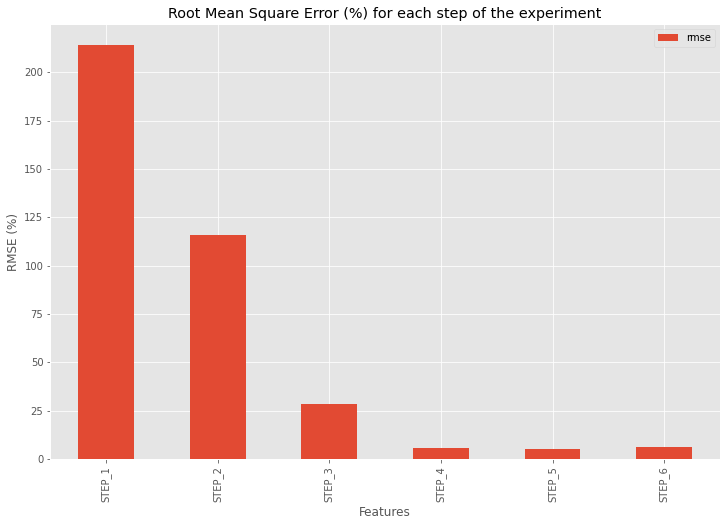

In [ ]:
# Plot
plt.style.use('ggplot') 
ax = plt.gca()
df_error.plot.bar(figsize=(12, 8), x='STEP', y='rmse', ax=ax)
plt.xlabel('Features')
plt.ylabel('RMSE (%)')
plt.title('Root Mean Square Error (%) for each step of the experiment')
plt.xticks(rotation=90)
plt.show()

---

## Additional Analysis
### Plot Features Importance for each model

*****Prot Features Importance for STEP: INITIAL_DATA*****


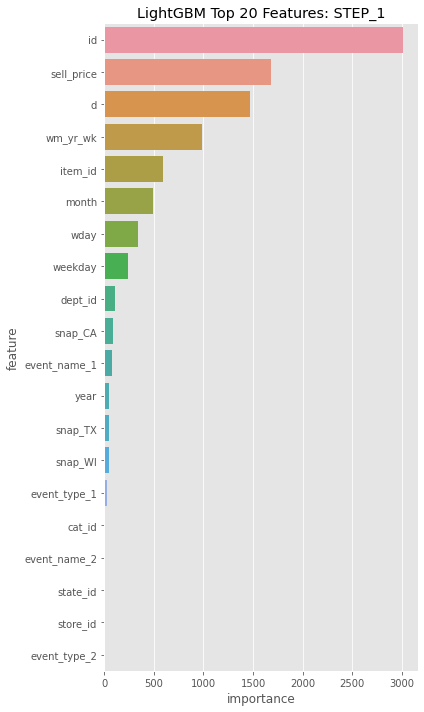

*****Prot Features Importance for STEP: INITIAL + LAG + AVERAGES*****


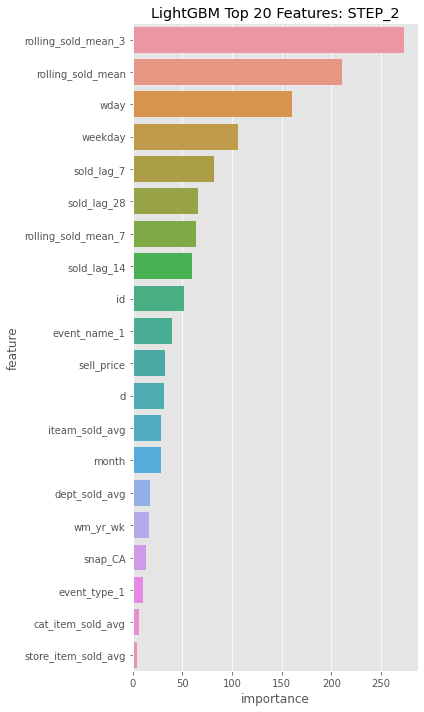

*****Prot Features Importance for STEP: INITIAL + LAG + AVERAGES + ROLLING MEAN*****


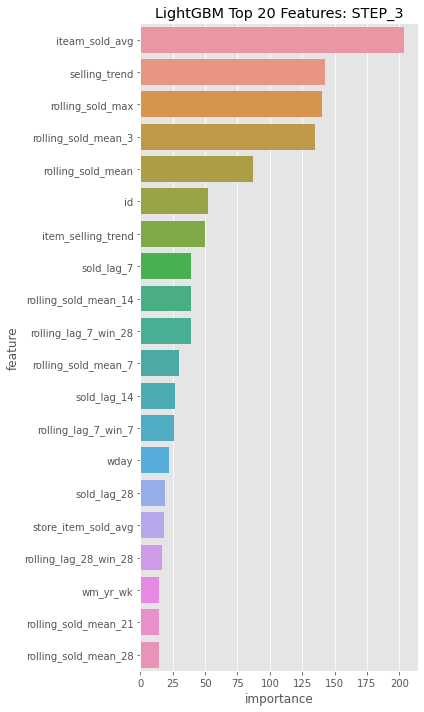

*****Prot Features Importance for STEP: INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX*****


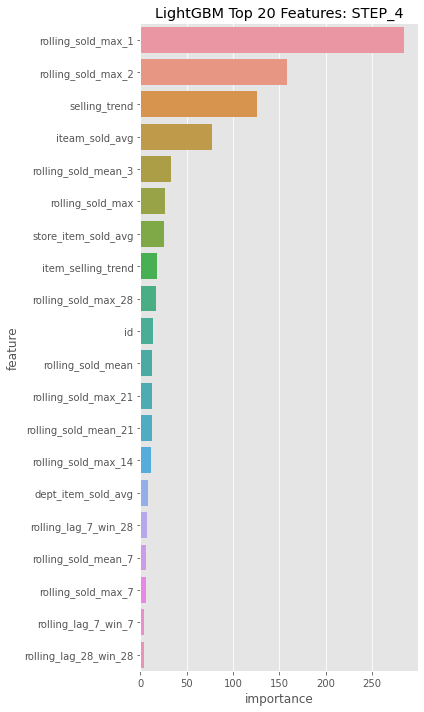

*****Prot Features Importance for STEP: INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED*****


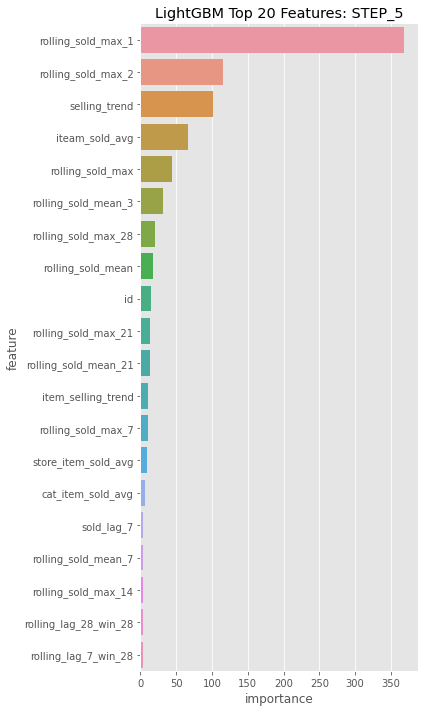

*****Prot Features Importance for STEP: INITIAL + LAG AND AVERAGES + ROLLING MEAN + TREND AND ROLLING MAX + STOCK-OUT AND STORE CLOSED + PRICE COMPARISON*****


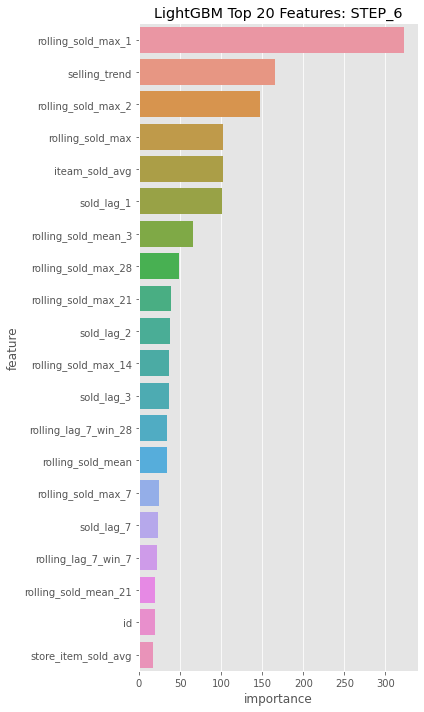

In [ ]:
# Folder for Models 
for step in LIST_STEPS:
    print('*****Prot Features Importance for STEP: {}*****'.format(dict_stepname[step]))

    FOLDER_MODEL = 'Model/{}/{}_Features_Improved/'.format(data_size, step)
    Path(FOLDER_MODEL).mkdir(parents=True, exist_ok=True)
    COLS_SCOPE = dict_features[step]

    feature_importance_df = pd.DataFrame()
    features = [f for f in COLS_SCOPE if f != 'sold']

    for store in stores:
        store_name = d_store_id[store]
        filename = FOLDER_MODEL + 'model_features_total-' + str(d_store_id[store])+'.pkl'
        # load model
        model = joblib.load(filename)

        # Create features importance for this model
        store_importance_df = pd.DataFrame()
        store_importance_df["feature"] = features
        store_importance_df["importance"] = model.feature_importances_
        store_importance_df["store"] = store_name

        # Concat
        feature_importance_df = pd.concat([feature_importance_df, store_importance_df], axis=0)

    # Features Importances Analysis
    df_fi_mean = pd.DataFrame(feature_importance_df[
        ["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False))
    df_fi_mean.columns = ['importance']
    df_fi_mean['%_importance'] = (100 * df_fi_mean['importance']/df_fi_mean['importance'].sum(axis =0)).round(2)
    df_fi_mean.to_excel(FOLDER_MODEL + 'Features_Importance_{}.xlsx'.format(step))


    # Plot
    cols = df_fi_mean[:20].index
    best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

    fig = plt.figure(figsize=(6,10))
    ax = fig.gca()
    sns.barplot(x="importance", y="feature", data = best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Top 20 Features: {}'.format(step))
    plt.tight_layout()
    fig.savefig(FOLDER_MODEL + 'Features_Importance_{}.png'.format(step))
    plt.show()